## Analyse des données pour le projet de session Machine Learning : 

### Objectif
Analyser des facteurs prédictifs pouvant amener à un étudiant à graduer ou abandonner l'université.

### Importation des librairies nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import json
from load_dataset import load_data

rcParams['figure.figsize'] = 12, 9

### Fonction pour l'analyse statistique

In [3]:
def analyse_stats_donnee(donnee, colonne, type):
    if type == "Catégorique":
        sns.countplot(donnee, x=colonne, hue=donnee["Cible"])
    elif type == "Numérique":
        sns.histplot(donnee, x=colonne, bins=100, hue=donnee["Cible"])
    
    plt.title(f"Histogramme sur les données ({colonne})")
    plt.xlabel(f"{colonne}")
    plt.ylabel("Fréquence")
    plt.show()

    with open('./donnee_info.json', 'r') as openfile:
        donnee_info = json.load(openfile)

    print(f"Informations intéressantes sur les données de la colonne {colonne} :")
    print("-------------------------------------------------------------------")
    print(donnee[colonne].describe())
    print("\n")
    print(f"Valeurs majoritaire de la colonne ({colonne}) :")
    print("------------------------------------------------")
    if len(donnee[colonne].unique()) == 2:
        top_index = donnee[colonne].value_counts().iloc[:2].index
        top_val = donnee[colonne].value_counts().iloc[:2].values
        if type == "Catégorique":
            print(f"{donnee_info[colonne][str(top_index[0])]} ({top_index[0]}) : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{donnee_info[colonne][str(top_index[1])]} ({top_index[1]}) : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
        if type == "Numérique":
            print(f"{top_index[0]} : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{top_index[1]} : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
    elif len(donnee[colonne].unique()) >= 3:
        top_index = donnee[colonne].value_counts().iloc[:3].index
        top_val = donnee[colonne].value_counts().iloc[:3].values
        if type == "Catégorique":
            print(f"{donnee_info[colonne][str(top_index[0])]} ({top_index[0]}) : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{donnee_info[colonne][str(top_index[1])]} ({top_index[1]}) : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
            print(f"{donnee_info[colonne][str(top_index[2])]} ({top_index[2]}) : {top_val[2]} ({(top_val[2] / donnee[colonne].size)*100:.2f}%)")
        if type == "Numérique":
            print(f"{top_index[0]} : {top_val[0]} ({(top_val[0] / donnee[colonne].size)*100:.2f}%)")
            print(f"{top_index[1]} : {top_val[1]} ({(top_val[1] / donnee[colonne].size)*100:.2f}%)")
            print(f"{top_index[2]} : {top_val[2]} ({(top_val[2] / donnee[colonne].size)*100:.2f}%)")

### Fonction Heatmap

In [4]:
def heatmap(donnee):
    # Calculer la matrice de corrélation
    correlation_matrix = donnee.corr()

    # Créer un Heatmap
    plt.figure(figsize=(25, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap Correlation')
    plt.show()

### Instancier le jeu de données

In [5]:
data, _ = load_data().get_original_dataframe(keep_type=True)

### Description du jeu de données :

Cet ensemble de données contient des données provenant d'un établissement d'enseignement supérieur sur diverses variables liées aux étudiants de premier cycle, notamment la démographie, les facteurs socio-économiques et les performances académiques, afin d'étudier l'impact de ces facteurs sur l'abandon scolaire et la réussite scolaire.

- `Etat civil (Catégorique)` :
  - 1 : Célibataire
  - 2 : Marié(e)
  - 3 : Veuf
  - 4 : Divorcé(e)
  - 5 : Union de fait
  - 6 : Séparés légalement
- `Mode d'application (Catégorique)` (À revoir car l'info est complexe) :
  - 1 : 1ère phase – contingent général
  - 2 : Ordonnance No. 612/93 (À voir ça veut dire quoi)
  - 3 : 1ère phase – contingent spécial (île des Açores ou "Azores Island" en anglais)
  - 4 : Titulaires d'autres formations supérieures
  - 5 : Ordonnance No. 854-B/99 (À voir ça veut dire quoi)
  - 6 : Étudiant international (licence ou "bachelor" en anglais)
  - 7 : 1ère phase – contingent spécial (île de Madère ou "Madeira Island" en anglais)
  - 8 : 2e phase – contingent général
  - 9 : 3ème phase – contingent général
  - 10 : Ordonnance No. 533-A/99, point b2) (Plan différent)
  - 11 : Ordonnance No. 533-A/99, point b3) (Autre institution)
  - 12 : Plus de 23 ans
  - 13 : Transfert
  - 14 : Changement de cours ou "Change in course" en anglais
  - 15 : Titulaires d'un diplôme de spécialisation technologique
  - 16 : Changement d'établissement/de cours
  - 17 : Titulaires d'un diplôme de cycle court
  - 18 : Changement d'établissement/de cours (International)
- `L'ordre d'application (Numérique)` :
  - L'ordre dans lequel l'étudiant a postulé (0 - premier choix, et 9 - dernier choix)
  - Valeurs numériques de 0 à 9
- `Cours (Catégorique)` :
  - 1 : Technologies de production de biocarburants
  - 2 : Conception d'animation et multimédia 
  - 3 : Service Social (présence en soirée)
  - 4 : Agronomie
  - 5 : Conception de communications
  - 6 : Soins infirmiers vétérinaires
  - 7 : Génie informatique
  - 8 : Équiniculture
  - 9 : Gestion
  - 10 : Service social
  - 11 : Tourisme
  - 12 : Soins infirmier
  - 13 : Hygiène buccale (Dentiste ou Hygiéniste dentaire) ou "Oral Hygiene" en anglais
  - 14 : Gestion de la publicité et du marketing
  - 15 : Journalisme et communication
  - 16 : Éducation de base ou "Basic Education" en anglais
  - 17 : Gestion (présence en soirée)
- `Présence de jour/soir (Catégorique)` :
  - 0 : Soir ou "Evening" en anglais
  - 1 : Jour ou "Daytime" en anglais
- `Qualification antérieure ou Diplôme antérieure (Catégorique)` :
  - 1 : Étude secondaire
  - 2 : Étude supérieure – baccalauréat
  - 3 : Étude supérieure – diplôme
  - 4 : Étude supérieure – maîtrise
  - 5 : Étude supérieure – doctorat
  - 6 : Fréquence d'étude supérieure ou "Frequency of higher education" en anglais (À revoir)
  - 7 : 12e année de scolarité – non terminée 
  - 8 : 11e année de scolarité – non terminée 
  - 9 : Autre – 11e année de scolarité
  - 10 : 10e année de scolarité
  - 11 : 10e année de scolarité - non terminée
  - 12 : Étude de base de 3e cycle (9ème/10ème/11ème année) ou équivalent
  - 13 : Étude de base de 2e cycle (6e/7e/8e année) ou équivalent
  - 14 : Cours de spécialisation technologique
  - 15 : Étude supérieure – diplôme (1er cycle)
  - 16 : Cours technique supérieur professionnel
  - 17 : Étude supérieure – maîtrise (2e cycle)
- `Nationalité (Catégorique)` :
  - 1 : Portugais
  - 2 : Allemand
  - 3 : Espagnol
  - 4 : Italien
  - 5 : Néerlandais
  - 6 : Anglais (UK)
  - 7 : Lituanien
  - 8 : Angolais
  - 9 : Cap-Verdien
  - 10 : Guinéen
  - 11 : Mozambicain
  - 12 : Santoméen
  - 13 : Turc
  - 14 : Brésilien
  - 15 : Roumain
  - 16 : Moldavie (République de)
  - 17 : Mexicain
  - 18 : Ukrainien
  - 19 : Russe
  - 20 : Cubain
  - 21 : Colombien
- `Qualification de la mère ou du père (Catégorique)` :
  - 1 : Étude secondaire – 12e année de scolarité ou équivalent
  - 2 : Étude supérieure – baccalauréat
  - 3 : Étude supérieure – diplôme
  - 4 : Étude supérieure – maîtrise
  - 5 : Étude supérieure – doctorat
  - 6 : Fréquence d'étude supérieure ou "Frequency of higher education" en anglais (À revoir)
  - 7 : 12e année de scolarité – non terminée 
  - 8 : 11e année de scolarité – non terminée 
  - 9 : 7ème année (ancienne) (À voir ça veut dire quoi)
  - 10 : Autre – 11e année de scolarité
  - 11 : Cours complémentaire de 2ème année du lycée (high school)
  - 12 : 10ème année de scolarité
  - 13 : Cours de commerce général
  - 14 : Étude de base de 3e cycle (9ème/10ème/11ème année) ou équivalent
  - 15 : Cours complémentaire de lycée (high school)
  - 16 : Cours technico-professionnel
  - 17 : Cours complémentaire de lycée (high school) – non terminé
  - 18 : 7ème année de scolarité
  - 19 : 2ème cycle du cursus général du lycée (high school)
  - 20 : 9e année de scolarité – non terminée
  - 21 : 8ème année de scolarité
  - 22 : Cours Général d'Administration et de Commerce
  - 23 : Comptabilité et administration supplémentaires
  - 24 : Inconnu
  - 25 : Ne sait ni lire ni écrire
  - 26 : Savoir lire sans avoir une 4ème année de scolarité
  - 27 : Étude de base de 1er cycle (4e/5e année) ou équivalent
  - 28 : Étude de base de 2e cycle (6e/7e/8e année) ou équivalent
  - 29 : Cours de spécialisation technologique
  - 30 : Étude supérieure – diplôme (1er cycle)
  - 31 : Parcours d'études supérieures spécialisées
  - 32 : Cours technique supérieur professionnel
  - 33 : Étude supérieure – maîtrise (2e cycle)
  - 34 : Étude supérieure – doctorat (3e cycle)
- `Occupation de la mère ou du père (Catégorique)` :
  - 1 : Étudiant
  - 2 : Représentants du Pouvoir Législatif et des Organes Exécutifs, Directeurs et Dirigeants Exécutifs (Pas sûr de la traduction)
  - 3 : Spécialistes en activités intellectuelles et scientifiques
  - 4 : Techniciens et professions de niveau intermédiaire
  - 5 : Personnel administratif
  - 6 : Travailleurs des services personnels, de la sécurité et de la sûreté et vendeurs
  - 7 : Agriculteurs et travailleurs qualifiés de l’agriculture, des pêches et des forêts
  - 8 : Ouvriers qualifiés de l’industrie, de la construction et des artisans
  - 9 : Opérateurs d'installations, de machines et ouvriers d'assemblage
  - 10 : Travailleurs sans compétences
  - 11 : Métiers des Forces armées
  - 12 : Autre situation
  - 13 : (vide)/(blank)
  - 14 : Officiers des Forces armées
  - 15 : Sergents des forces armées
  - 16 : Autres membres des forces armées
  - 17 : Directeurs des services administratifs et commerciaux
  - 18 : Directeurs d'hôtellerie, de restauration, de commerce et autres services
  - 19 : Spécialistes en sciences physiques, mathématiques, ingénierie et techniques connexes
  - 20 : Professionnels de la santé
  - 21 : Enseignants
  - 22 : Spécialistes en finance, comptabilité, organisation administrative et relations publiques et commerciales
  - 23 : Techniciens et professions scientifiques et ingénieries de niveau intermédiaire
  - 24 : Techniciens et professionnels de niveau intermédiaire de la santé
  - 25 : Techniciens de niveau intermédiaire des services juridiques, sociaux, sportifs, culturels et assimilés
  - 26 : Techniciens en technologies de l'information et de la communication
  - 27 : Employés de bureau, secrétaires en général et opérateurs de traitement de données
  - 28 : Opérateurs liés aux données, à la comptabilité, aux statistiques, aux services financiers et aux registres
  - 29 : Autre personnel de soutien administratif
  - 30 : Travailleurs des services personnels
  - 31 : Vendeurs
  - 32 : Travailleurs des soins personnels et autres
  - 33 : Personnel des services de protection et de sécurité
  - 34 : Agriculteurs orientés vers le marché et travailleurs qualifiés en production agricole et animale
  - 35 : Agriculteurs, éleveurs, pêcheurs, chasseurs et cueilleurs et subsistance
  - 36 : Ouvriers du bâtiment qualifiés et assimilés, à l'exception des électriciens
  - 37 : Ouvriers qualifiés en métallurgie, travail des métaux et assimilés
  - 38 : Ouvriers qualifiés en électricité et électronique
  - 39 : Travailleurs de l'industrie agroalimentaire, du travail du bois, de l'habillement et d'autres industries et artisanats
  - 40 : Opérateurs d'installations fixes et de machines
  - 41 : Ouvriers d'assemblage
  - 42 : Conducteurs de véhicules et opérateurs d’équipements mobiles
  - 43 : Travailleurs non qualifiés dans l'agriculture, la production animale, la pêche et la foresterie
  - 44 : Travailleurs non qualifiés dans les industries extractives, la construction, la fabrication et les transports
  - 45 : Assistants à la préparation des repas
  - 46 : Vendeurs de rue (sauf nourriture) et prestataires de services de rue
- `Déplacé (Catégorique)` :
  - Une personne déplacée est un individu contraint de quitter son domicile ou son lieu de résidence habituel pour diverses raisons telles que les conflits, la persécution, les catastrophes naturelles ou les crises d'origine humaine. Ce déplacement peut se faire à l'intérieur de leur propre pays (personne déplacée à l'intérieur de son pays, PDIP) ou à travers les frontières internationales (réfugié)
  - 0 : Non
  - 1 : Oui
- `Besoins éducatifs spéciaux (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Débiteur/Dettes (Catégorique)` :
  - `Une personne qui doit une somme d’argent, qui a des dettes`
  - 0 : Non
  - 1 : Oui
- `Frais de scolarité à jour (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Sexe (Catégorique)` :
  - 0 : Femme
  - 1 : Homme
- `Bourse scolaire (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Âge à l'inscription (Numérique)` :
  - Valeurs numériques de l'âge à l'inscription
- `International (Catégorique)` :
  - 0 : Non
  - 1 : Oui
- `Unités curriculaires 1er semestre (créditées) (Numérique)` :
  - Le nombre d'unités d'études créditées par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (inscrits) (Numérique)` :
  - Le nombre d'unités d'études inscrites par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (évaluations) (Numérique)` :
  - Le nombre d'unités d'études évaluées par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (approuvées) (Numérique)` :
  - Le nombre d'unités d'études approuvées par l'étudiant au premier semestre
- `Unités curriculaires 1er semestre (note) (Numérique)` :
  - ?
- `Unités curriculaires 1er semestre (sans évaluations) (Numérique)` :
  - ?
- `Unités curriculaires 2e semestre (créditées) (Numérique)` :
  - Le nombre d'unités d'études créditées par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (inscrits) (Numérique)` :
  - Le nombre d'unités d'études inscrites par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (évaluations) (Numérique)` :
  - Le nombre d'unités d'études évaluées par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (approuvées) (Numérique)` :
  - Le nombre d'unités d'études approuvées par l'étudiant au second semestre
- `Unités curriculaires 2e semestre (note) (Numérique)` :
  - ?
- `Unités curriculaires 2e semestre (sans évaluations) (Numérique)` :
  - ?
- `Taux de chômage (Numérique)` :
  - Valeur numérique du taux de chômage. Plus il est élevé, plus il y a du chômage
- `Taux d'inflation (Numérique)` :
  - Valeur numérique du taux d'inflation. Si négatif, alors il y a une diminution par rapport à la période antérieure, si positif, il y a une augmentation par rapport à la prériode antérieure
- `PIB (Numérique)` :
  - Le Produit Intérieur Brut (PIB) est un indicateur clé utilisé pour mesurer la performance économique d'un pays. Il représente la valeur totale de tous les biens et services produits à l'intérieur des frontières du pays sur une période spécifique, généralement une année ou un trimestre
- `Cible (Catégorique)`:
  - 0 : Abandonné
  - 1 : Gradué
  - 2 : Inscrit

## Analyse des données (Statistique)

In [6]:
# Observer les infos sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   État civil                                            3630 non-null   int64  
 1   Mode d'application                                    3630 non-null   int64  
 2   Ordre d'application                                   3630 non-null   int64  
 3   Cours                                                 3630 non-null   int64  
 4   Présence jour/soir                                    3630 non-null   int64  
 5   Qualification antérieure                              3630 non-null   int64  
 6   Nationalité                                           3630 non-null   int64  
 7   Qualification mère                                    3630 non-null   int64  
 8   Qualification père                                    3630

In [7]:
# Observer la description des données
data.describe()

,État civil,Mode d'application,Ordre d'application,Cours,Présence jour/soir,Qualification antérieure,Nationalité,Qualification mère,Qualification père,Occupation mère,...,Unités curriculaires 2e semestre (créditées),Unités curriculaires 2e semestre (inscrits),Unités curriculaires 2e semestre (évaluations),Unités curriculaires 2e semestre (approuvées),Unités curriculaires 2e semestre (note),Unités curriculaires 2e semestre (sans évaluations),Taux de chômage,Taux d'inflation,PIB,Cible
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,6.810193,1.750138,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,7.212948,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.608540
std,0.613009,5.253618,1.333831,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,3.707343,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


### Données démographiques

`État civil`

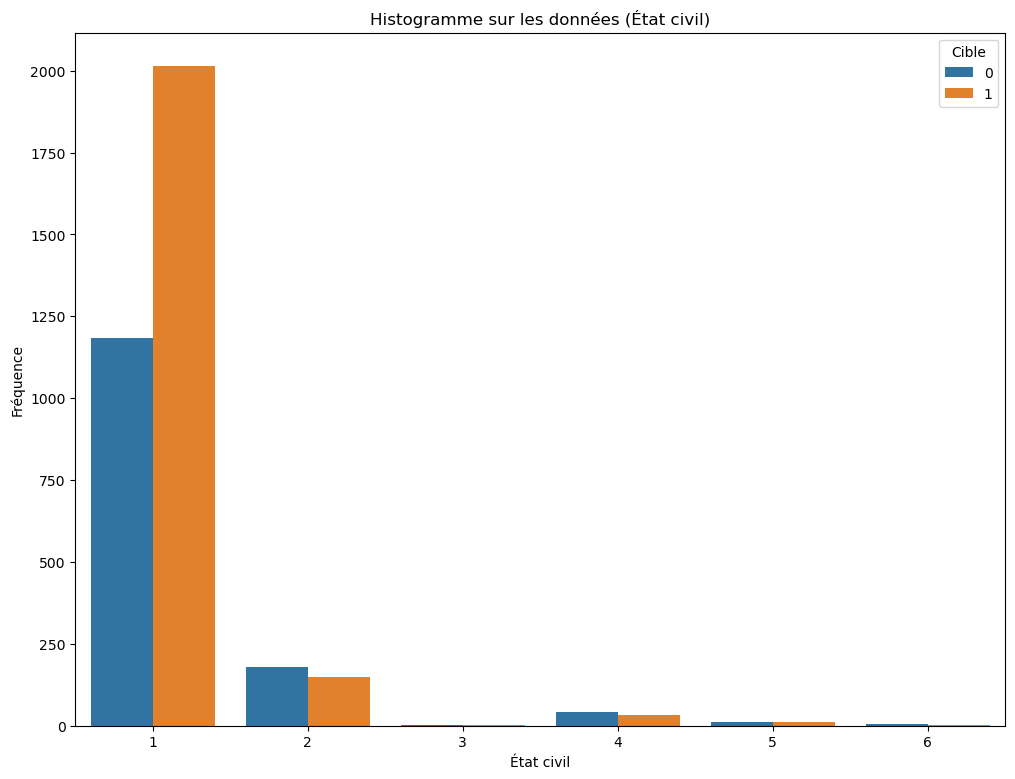

Informations intéressantes sur les données de la colonne État civil :
-------------------------------------------------------------------
count    3630.000000
mean        1.184298
std         0.613009
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: État civil, dtype: float64


Valeurs majoritaire de la colonne (État civil) :
------------------------------------------------
Célibataire (1) : 3199 (88.13%)
Marié(e) (2) : 327 (9.01%)
Divorcé(e) (4) : 75 (2.07%)


In [8]:
analyse_stats_donnee(data, "État civil", "Catégorique")

`Nationalité`

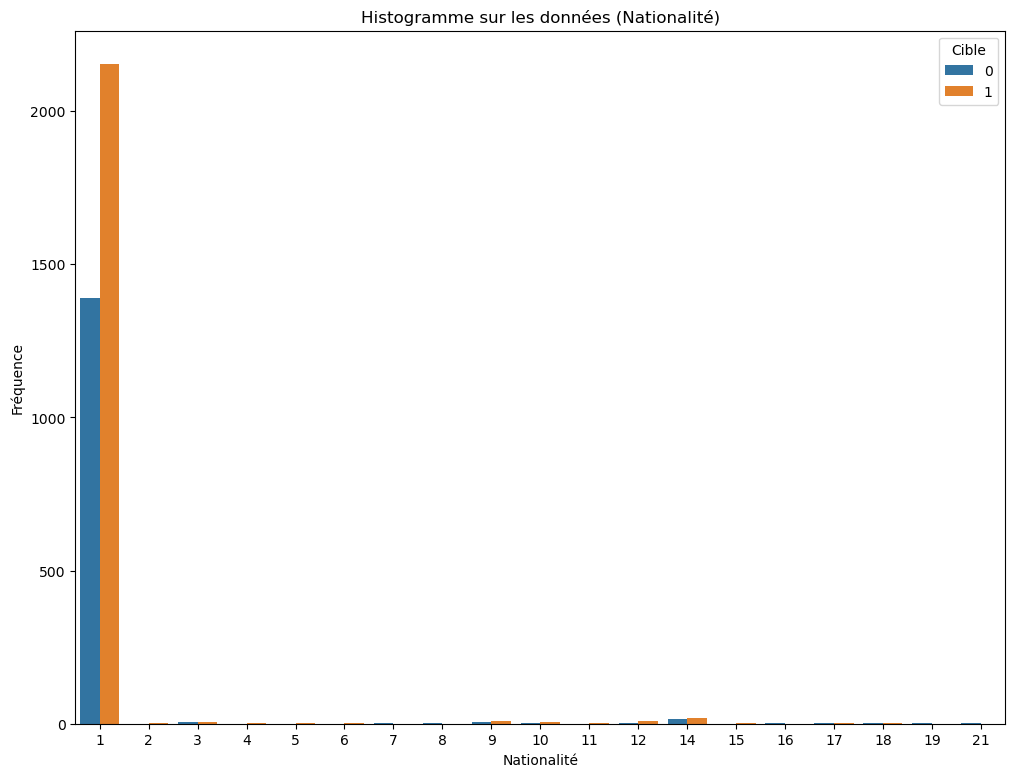

Informations intéressantes sur les données de la colonne Nationalité :
-------------------------------------------------------------------
count    3630.000000
mean        1.242424
std         1.700394
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        21.000000
Name: Nationalité, dtype: float64


Valeurs majoritaire de la colonne (Nationalité) :
------------------------------------------------
Portugais (1) : 3544 (97.63%)
Brésilien (14) : 32 (0.88%)
Cap-Verdien (9) : 12 (0.33%)


In [9]:
analyse_stats_donnee(data, "Nationalité", "Catégorique")

`Déplacé`

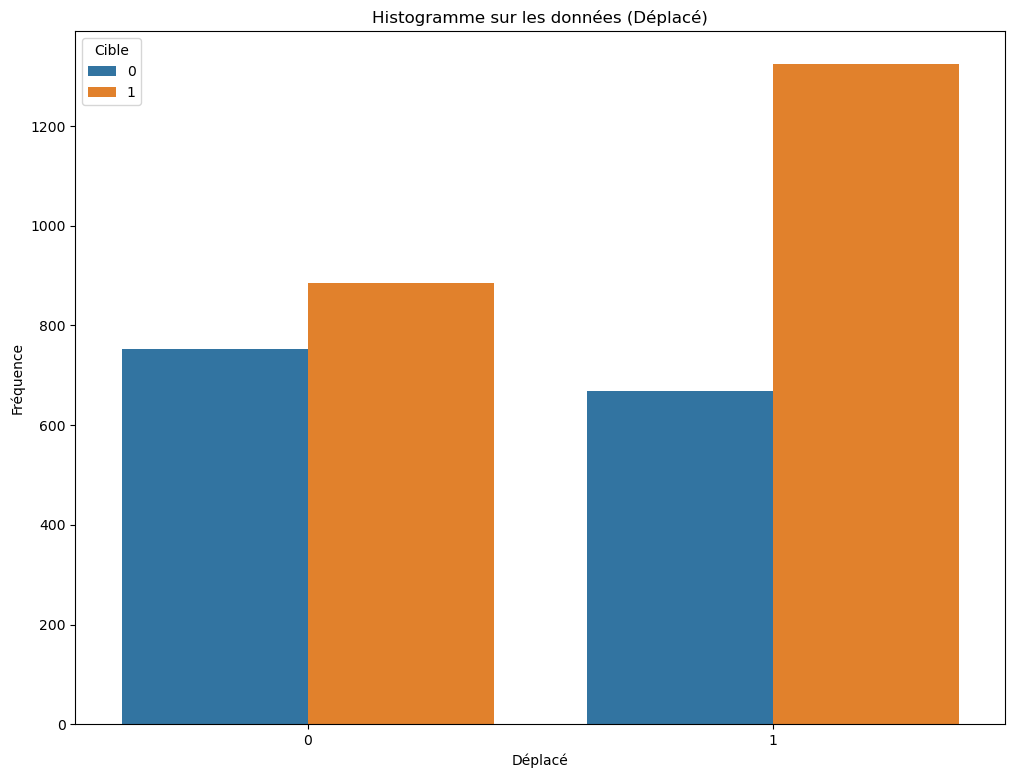

Informations intéressantes sur les données de la colonne Déplacé :
-------------------------------------------------------------------
count    3630.000000
mean        0.549036
std         0.497658
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Déplacé, dtype: float64


Valeurs majoritaire de la colonne (Déplacé) :
------------------------------------------------
Oui (1) : 1993 (54.90%)
Non (0) : 1637 (45.10%)


In [10]:
analyse_stats_donnee(data, "Déplacé", "Catégorique")

`Sexe`

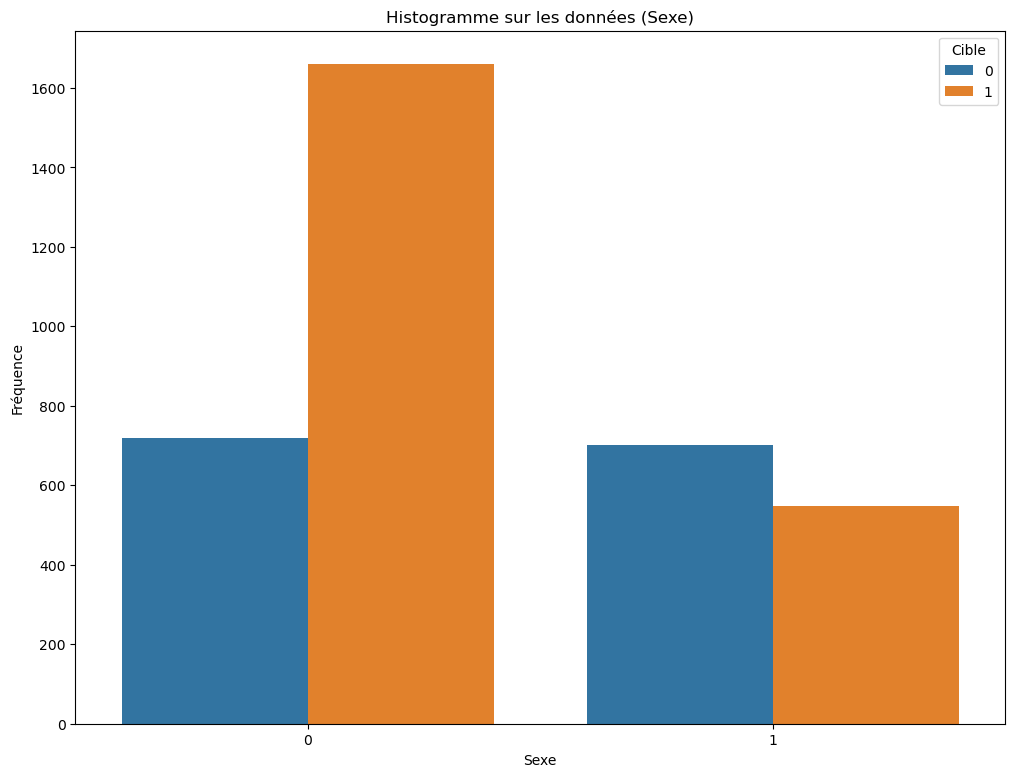

Informations intéressantes sur les données de la colonne Sexe :
-------------------------------------------------------------------
count    3630.000000
mean        0.344077
std         0.475132
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Sexe, dtype: float64


Valeurs majoritaire de la colonne (Sexe) :
------------------------------------------------
Femme (0) : 2381 (65.59%)
Homme (1) : 1249 (34.41%)


In [11]:
analyse_stats_donnee(data, "Sexe", "Catégorique")

`Âge à l'inscription`

Il est possible d'observer que l'âge à l'inscription est majoritairement entre 17 et 23 ans.

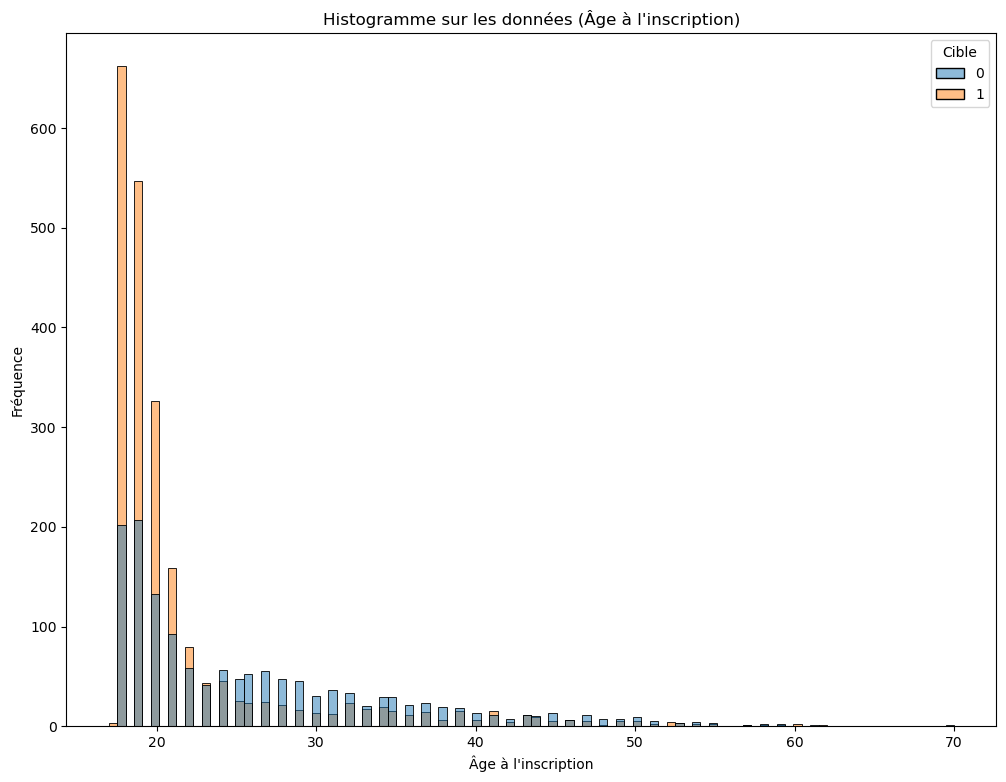

Informations intéressantes sur les données de la colonne Âge à l'inscription :
-------------------------------------------------------------------
count    3630.000000
mean       23.461157
std         7.827994
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Âge à l'inscription, dtype: float64


Valeurs majoritaire de la colonne (Âge à l'inscription) :
------------------------------------------------
18 : 864 (23.80%)
19 : 754 (20.77%)
20 : 459 (12.64%)


In [12]:
analyse_stats_donnee(data, "Âge à l'inscription", "Numérique")

`International`

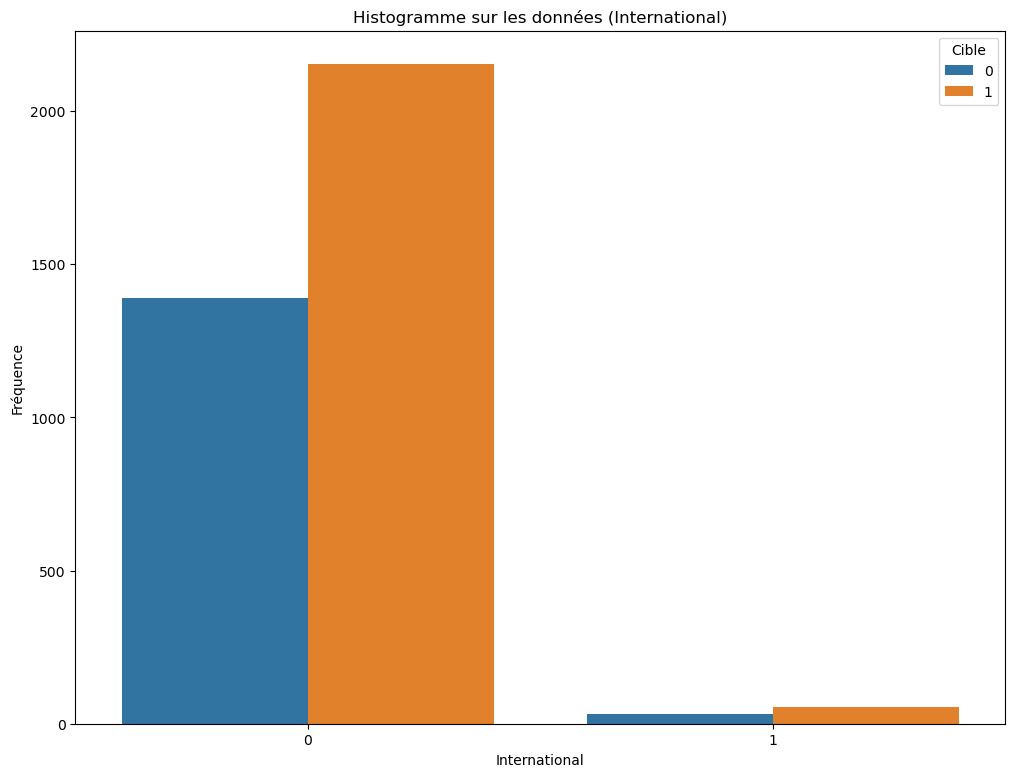

Informations intéressantes sur les données de la colonne International :
-------------------------------------------------------------------
count    3630.000000
mean        0.023691
std         0.152107
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: International, dtype: float64


Valeurs majoritaire de la colonne (International) :
------------------------------------------------
Non (0) : 3544 (97.63%)
Oui (1) : 86 (2.37%)


In [13]:
analyse_stats_donnee(data, "International", "Catégorique")

### Données socioéconomiques

`Qualification père`

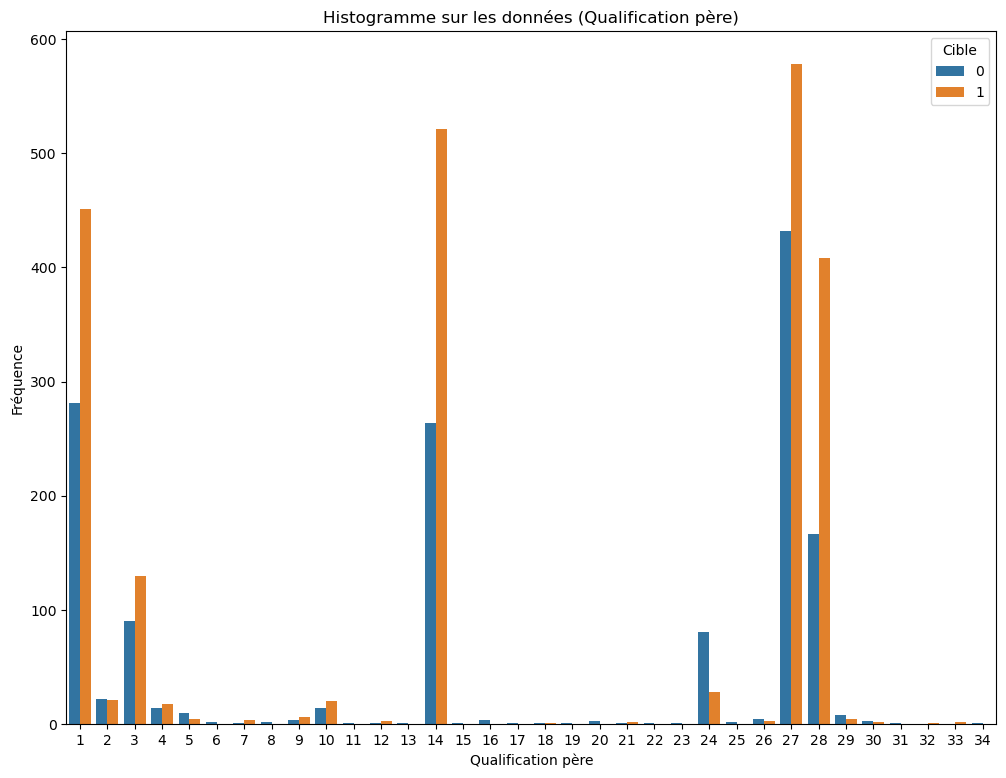

Informations intéressantes sur les données de la colonne Qualification père :
-------------------------------------------------------------------
count    3630.000000
mean       16.663636
std        10.993025
min         1.000000
25%         3.000000
50%        14.000000
75%        27.000000
max        34.000000
Name: Qualification père, dtype: float64


Valeurs majoritaire de la colonne (Qualification père) :
------------------------------------------------
Étude de base de 1er cycle (4e/5e année) ou équivalent (27) : 1010 (27.82%)
Étude de base de 3e cycle (9ème/10ème/11ème année) ou équivalent (14) : 785 (21.63%)
Étude secondaire – 12e année de scolarité ou équivalent (1) : 732 (20.17%)


In [14]:
analyse_stats_donnee(data, "Qualification père", "Catégorique")

`Qualification mère`

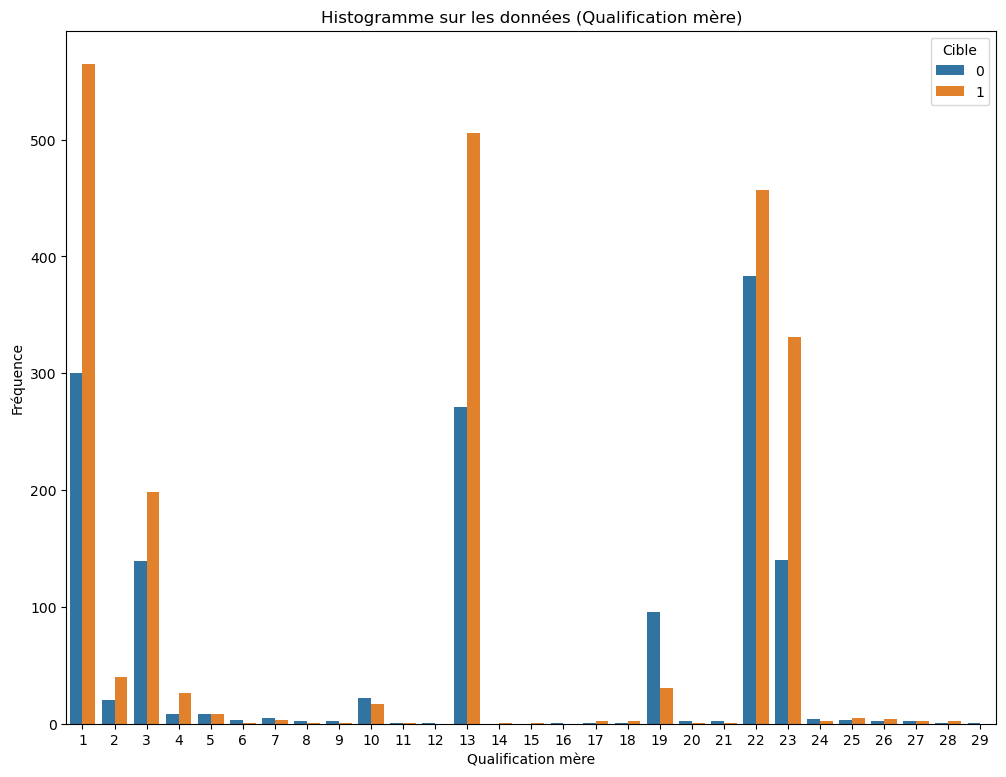

Informations intéressantes sur les données de la colonne Qualification mère :
-------------------------------------------------------------------
count    3630.000000
mean       12.558678
std         9.006183
min         1.000000
25%         2.000000
50%        13.000000
75%        22.000000
max        29.000000
Name: Qualification mère, dtype: float64


Valeurs majoritaire de la colonne (Qualification mère) :
------------------------------------------------
Étude secondaire – 12e année de scolarité ou équivalent (1) : 865 (23.83%)
Cours Général d'Administration et de Commerce (22) : 840 (23.14%)
Cours de commerce général (13) : 777 (21.40%)


In [15]:
analyse_stats_donnee(data, "Qualification mère", "Catégorique")

`Occupation père`

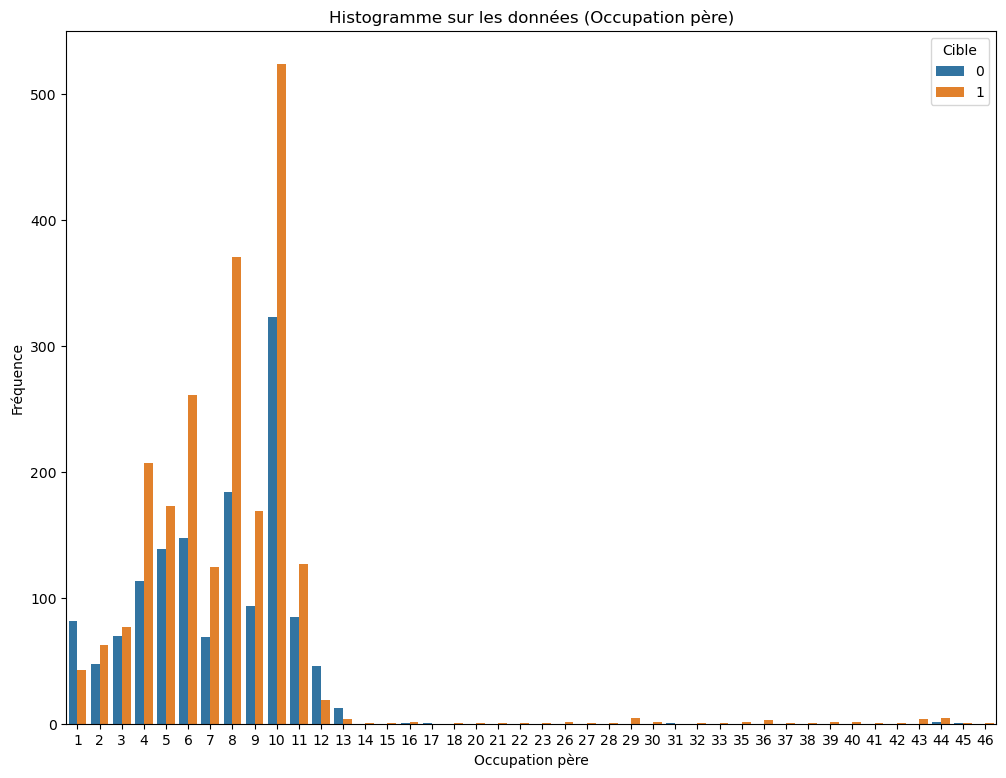

Informations intéressantes sur les données de la colonne Occupation père :
-------------------------------------------------------------------
count    3630.000000
mean        7.650138
std         4.315144
min         1.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        46.000000
Name: Occupation père, dtype: float64


Valeurs majoritaire de la colonne (Occupation père) :
------------------------------------------------
Travailleurs sans compétences (10) : 847 (23.33%)
Ouvriers qualifiés de l’industrie, de la construction et des artisans (8) : 555 (15.29%)
Travailleurs des services personnels, de la sécurité et de la sûreté et vendeurs (6) : 409 (11.27%)


In [16]:
analyse_stats_donnee(data, "Occupation père", "Catégorique")

`Occupation mère`

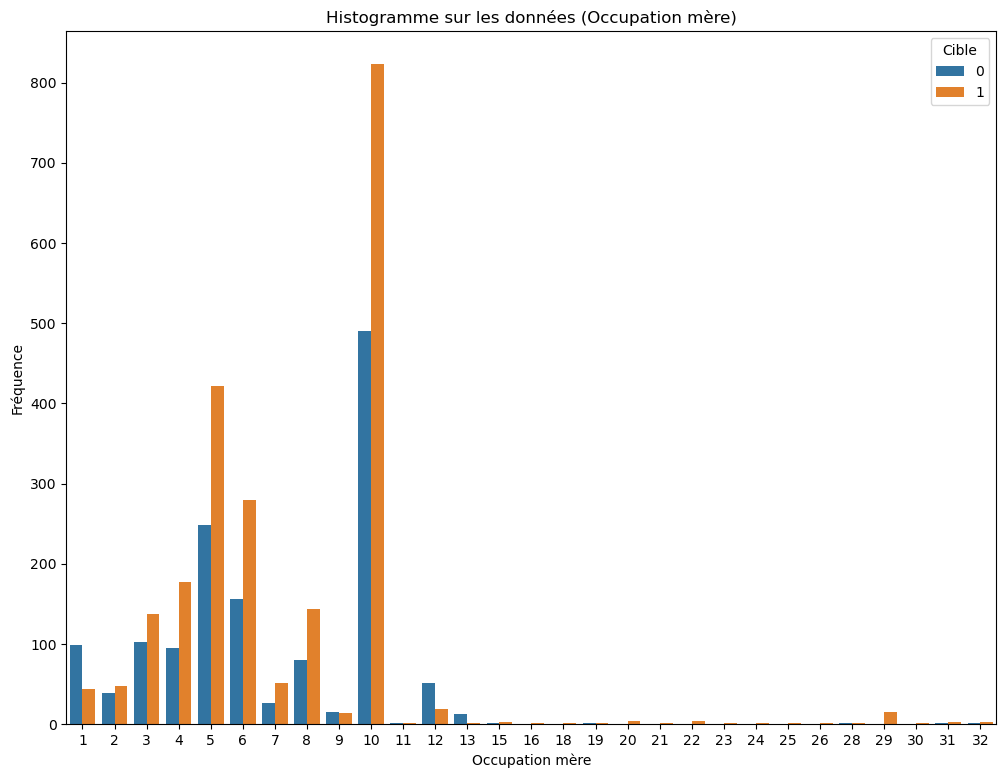

Informations intéressantes sur les données de la colonne Occupation mère :
-------------------------------------------------------------------
count    3630.000000
mean        7.212948
std         3.707343
min         1.000000
25%         5.000000
50%         6.000000
75%        10.000000
max        32.000000
Name: Occupation mère, dtype: float64


Valeurs majoritaire de la colonne (Occupation mère) :
------------------------------------------------
Travailleurs sans compétences (10) : 1313 (36.17%)
Personnel administratif (5) : 670 (18.46%)
Travailleurs des services personnels, de la sécurité et de la sûreté et vendeurs (6) : 436 (12.01%)


In [17]:
analyse_stats_donnee(data, "Occupation mère", "Catégorique")

`Besoins éducatifs spéciaux`

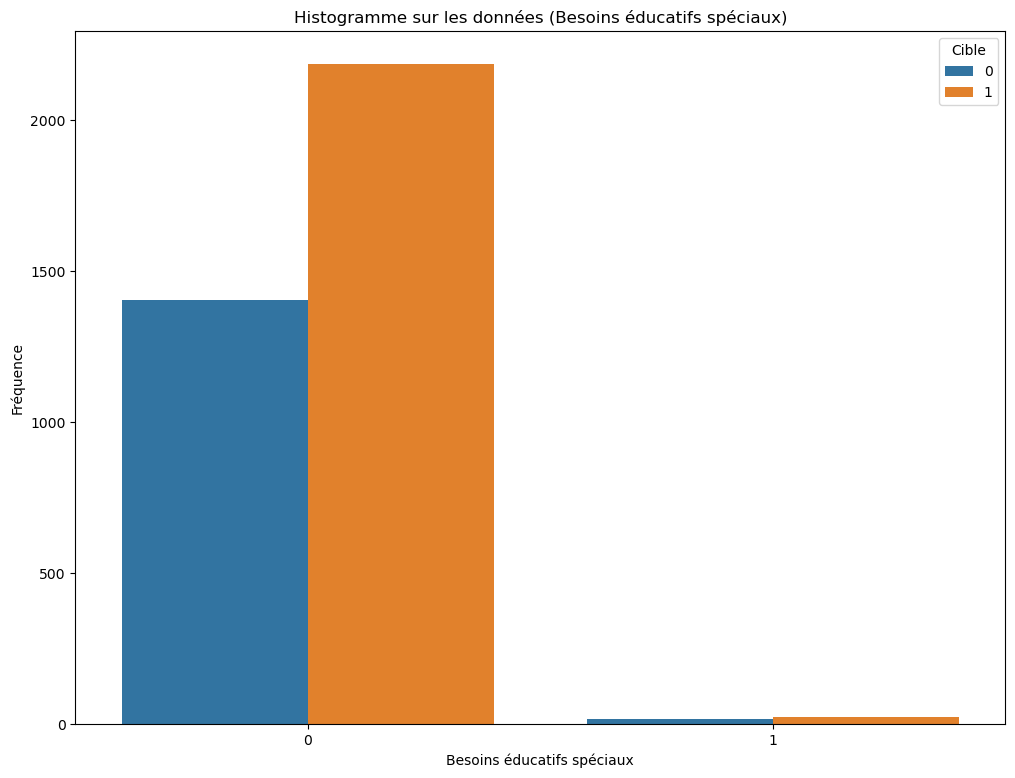

Informations intéressantes sur les données de la colonne Besoins éducatifs spéciaux :
-------------------------------------------------------------------
count    3630.000000
mean        0.011019
std         0.104407
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Besoins éducatifs spéciaux, dtype: float64


Valeurs majoritaire de la colonne (Besoins éducatifs spéciaux) :
------------------------------------------------
Non (0) : 3590 (98.90%)
Oui (1) : 40 (1.10%)


In [18]:
analyse_stats_donnee(data, "Besoins éducatifs spéciaux", "Catégorique")

`Dettes`

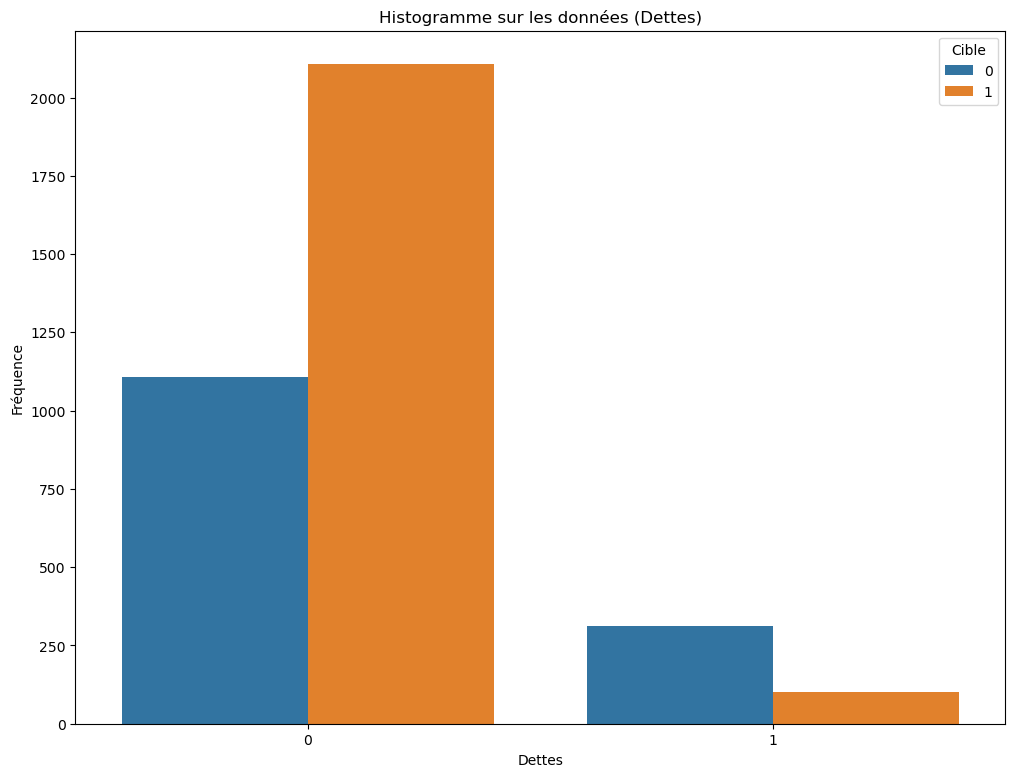

Informations intéressantes sur les données de la colonne Dettes :
-------------------------------------------------------------------
count    3630.000000
mean        0.113774
std         0.317580
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Dettes, dtype: float64


Valeurs majoritaire de la colonne (Dettes) :
------------------------------------------------
Non (0) : 3217 (88.62%)
Oui (1) : 413 (11.38%)


In [19]:
analyse_stats_donnee(data, "Dettes", "Catégorique")

`Frais de scolarité à jour`

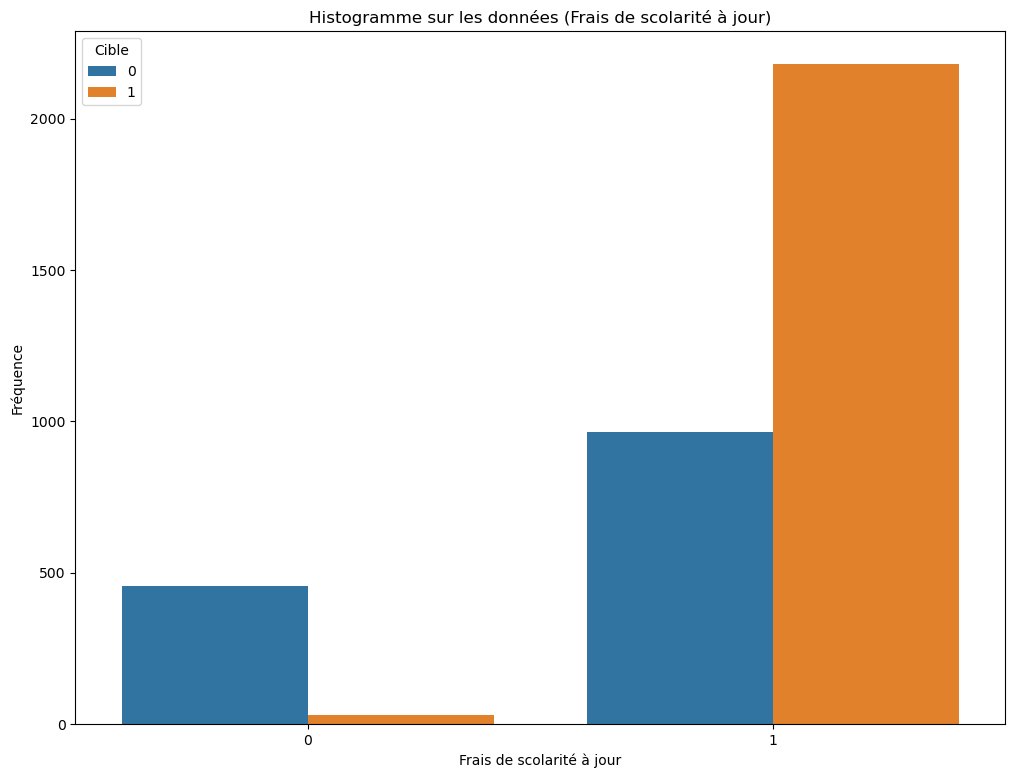

Informations intéressantes sur les données de la colonne Frais de scolarité à jour :
-------------------------------------------------------------------
count    3630.000000
mean        0.866116
std         0.340575
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Frais de scolarité à jour, dtype: float64


Valeurs majoritaire de la colonne (Frais de scolarité à jour) :
------------------------------------------------
Oui (1) : 3144 (86.61%)
Non (0) : 486 (13.39%)


In [20]:
analyse_stats_donnee(data, "Frais de scolarité à jour", "Catégorique")

`Bourse`

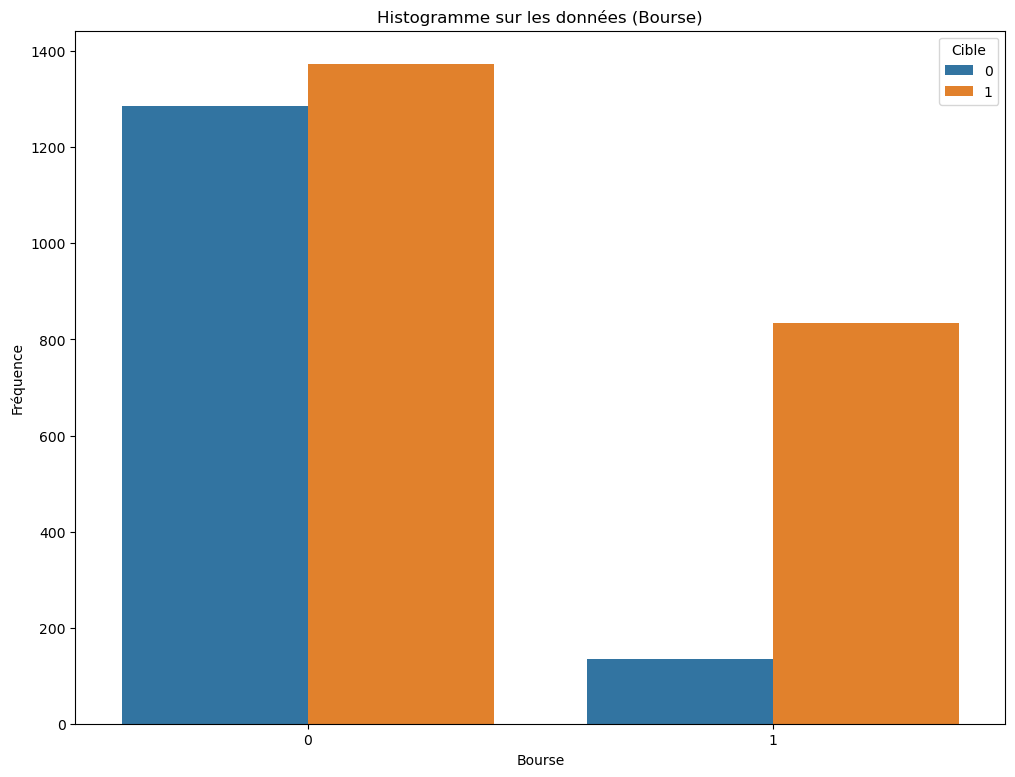

Informations intéressantes sur les données de la colonne Bourse :
-------------------------------------------------------------------
count    3630.000000
mean        0.266942
std         0.442423
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Bourse, dtype: float64


Valeurs majoritaire de la colonne (Bourse) :
------------------------------------------------
Non (0) : 2661 (73.31%)
Oui (1) : 969 (26.69%)


In [21]:
analyse_stats_donnee(data, "Bourse", "Catégorique")

### Données macroéconomiques

`Taux de chômage`

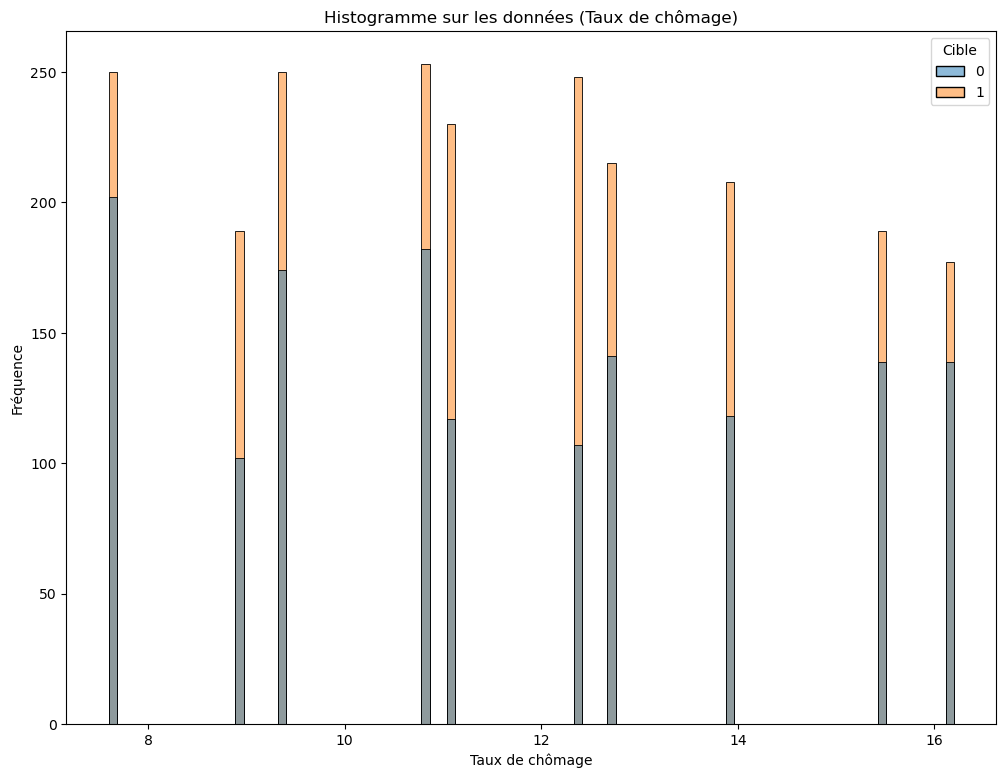

Informations intéressantes sur les données de la colonne Taux de chômage :
-------------------------------------------------------------------
count    3630.000000
mean       11.630358
std         2.667652
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Taux de chômage, dtype: float64


Valeurs majoritaire de la colonne (Taux de chômage) :
------------------------------------------------
7.6 : 452 (12.45%)
10.8 : 435 (11.98%)
9.4 : 424 (11.68%)


In [22]:
analyse_stats_donnee(data, "Taux de chômage", "Numérique")

`Taux d'inflation`

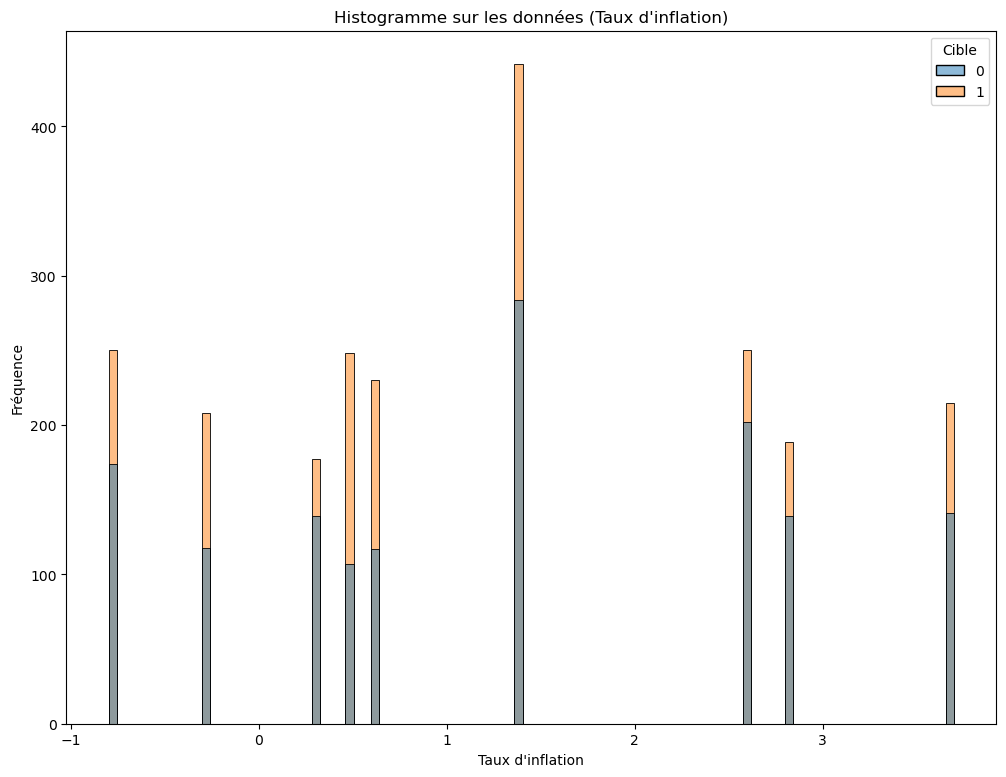

Informations intéressantes sur les données de la colonne Taux d'inflation :
-------------------------------------------------------------------
count    3630.000000
mean        1.231598
std         1.384911
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Taux d'inflation, dtype: float64


Valeurs majoritaire de la colonne (Taux d'inflation) :
------------------------------------------------
1.4 : 726 (20.00%)
2.6 : 452 (12.45%)
-0.8 : 424 (11.68%)


In [23]:
analyse_stats_donnee(data, "Taux d'inflation", "Numérique")

`PIB`

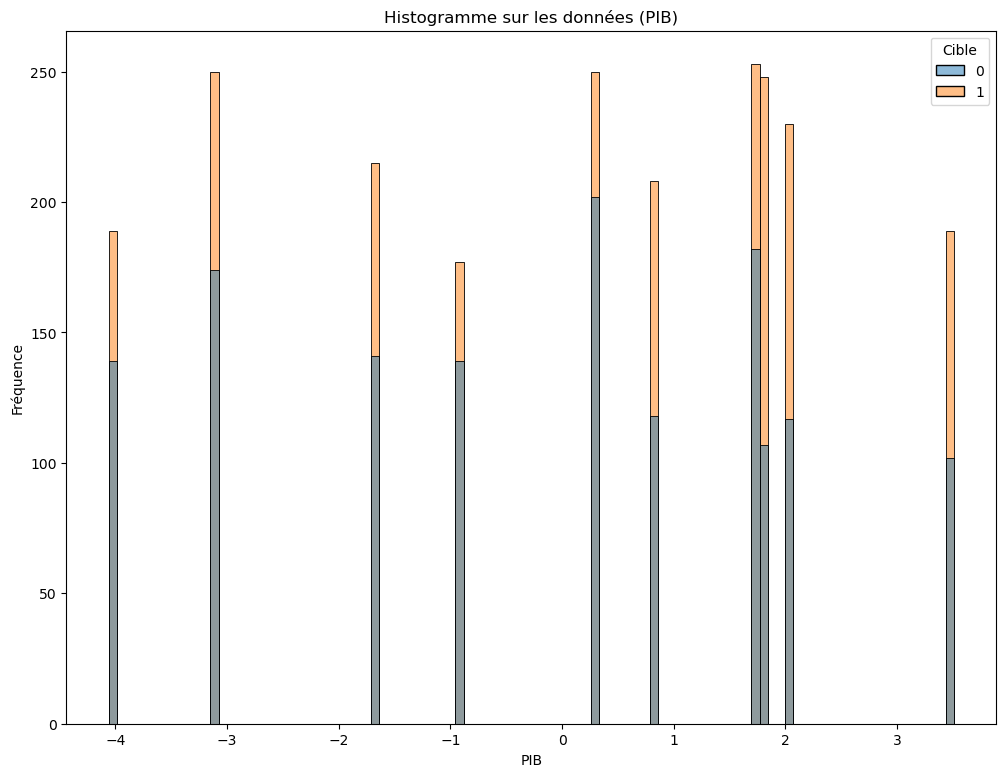

Informations intéressantes sur les données de la colonne PIB :
-------------------------------------------------------------------
count    3630.000000
mean       -0.009256
std         2.259986
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: PIB, dtype: float64


Valeurs majoritaire de la colonne (PIB) :
------------------------------------------------
0.32 : 452 (12.45%)
1.74 : 435 (11.98%)
-3.12 : 424 (11.68%)


In [24]:
analyse_stats_donnee(data, "PIB", "Numérique")

### Données académiques lors de l’inscription

`Mode d'application`

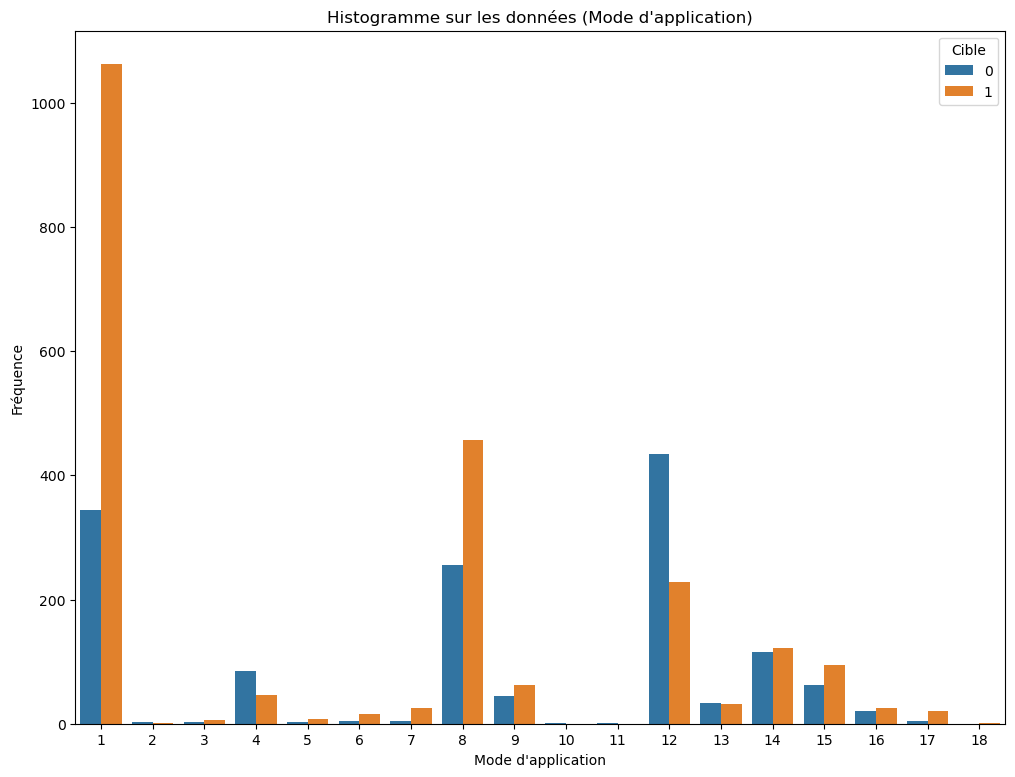

Informations intéressantes sur les données de la colonne Mode d'application :
-------------------------------------------------------------------
count    3630.000000
mean        6.810193
std         5.253618
min         1.000000
25%         1.000000
50%         8.000000
75%        12.000000
max        18.000000
Name: Mode d'application, dtype: float64


Valeurs majoritaire de la colonne (Mode d'application) :
------------------------------------------------
1ère phase – contingent général (1) : 1408 (38.79%)
2e phase – contingent général (8) : 713 (19.64%)
Plus de 23 ans (12) : 664 (18.29%)


In [25]:
analyse_stats_donnee(data, "Mode d'application", "Catégorique")

`Ordre d'application`

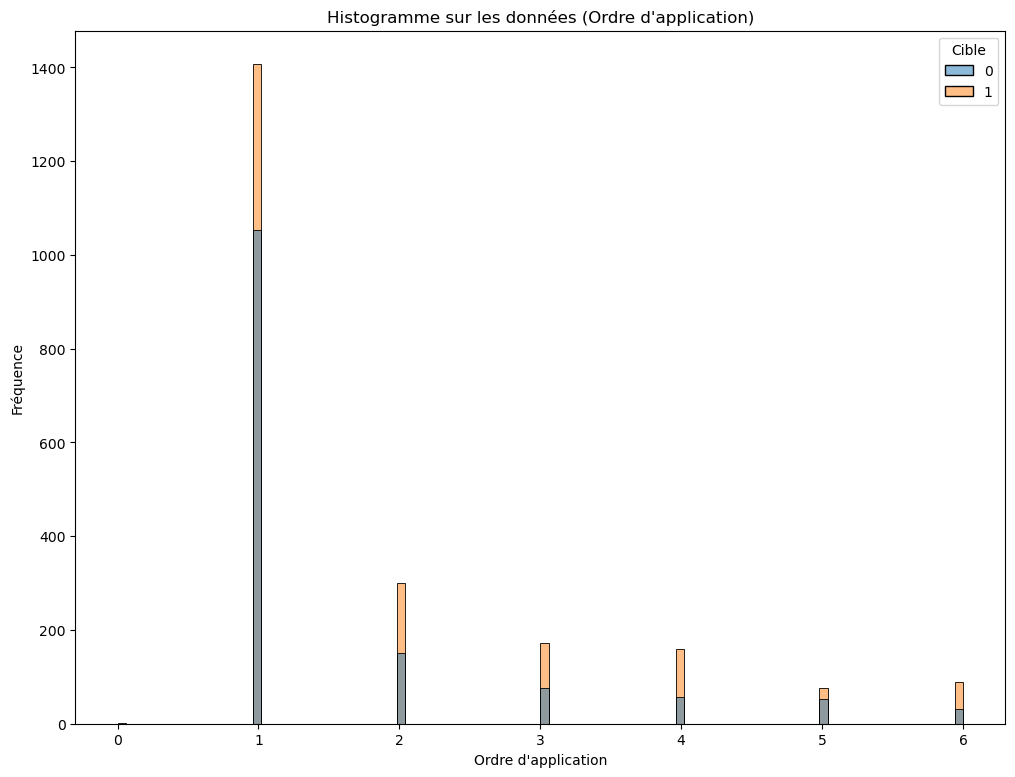

Informations intéressantes sur les données de la colonne Ordre d'application :
-------------------------------------------------------------------
count    3630.000000
mean        1.750138
std         1.333831
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Ordre d'application, dtype: float64


Valeurs majoritaire de la colonne (Ordre d'application) :
------------------------------------------------
1 : 2461 (67.80%)
2 : 451 (12.42%)
3 : 249 (6.86%)


In [26]:
analyse_stats_donnee(data, "Ordre d'application", "Numérique")

`Cours`

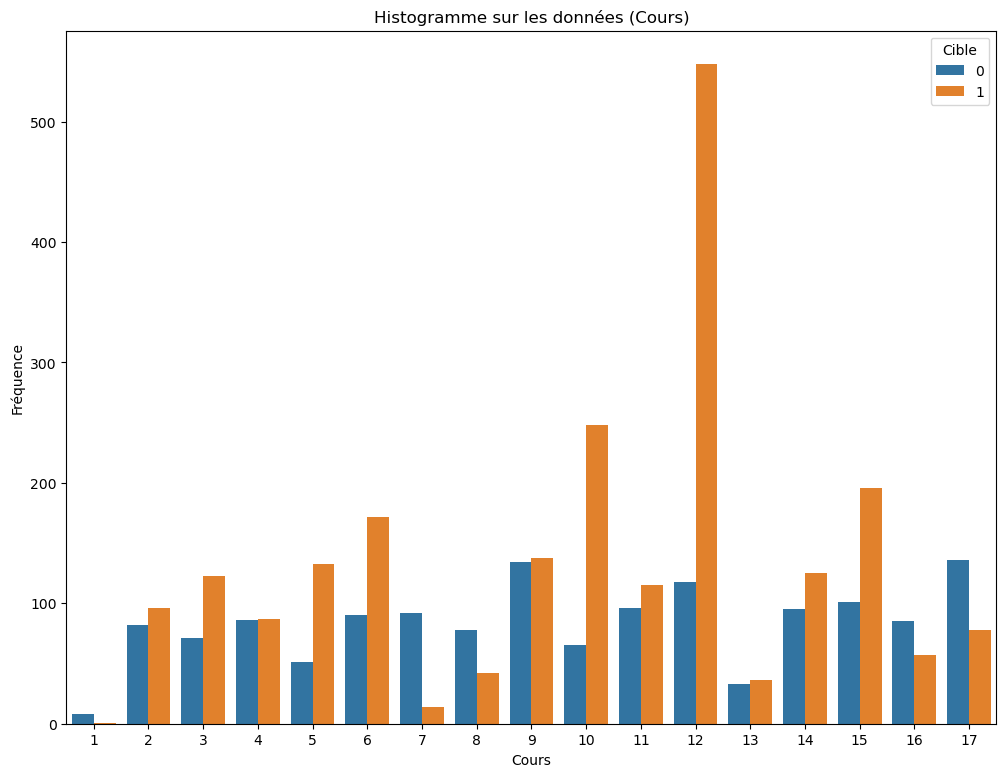

Informations intéressantes sur les données de la colonne Cours :
-------------------------------------------------------------------
count    3630.000000
mean        9.935537
std         4.340715
min         1.000000
25%         6.000000
50%        11.000000
75%        13.000000
max        17.000000
Name: Cours, dtype: float64


Valeurs majoritaire de la colonne (Cours) :
------------------------------------------------
Soins infirmier (12) : 666 (18.35%)
Service social (10) : 313 (8.62%)
Journalisme et communication (15) : 297 (8.18%)


In [27]:
analyse_stats_donnee(data, "Cours", "Catégorique")

`Présence jour/soir`

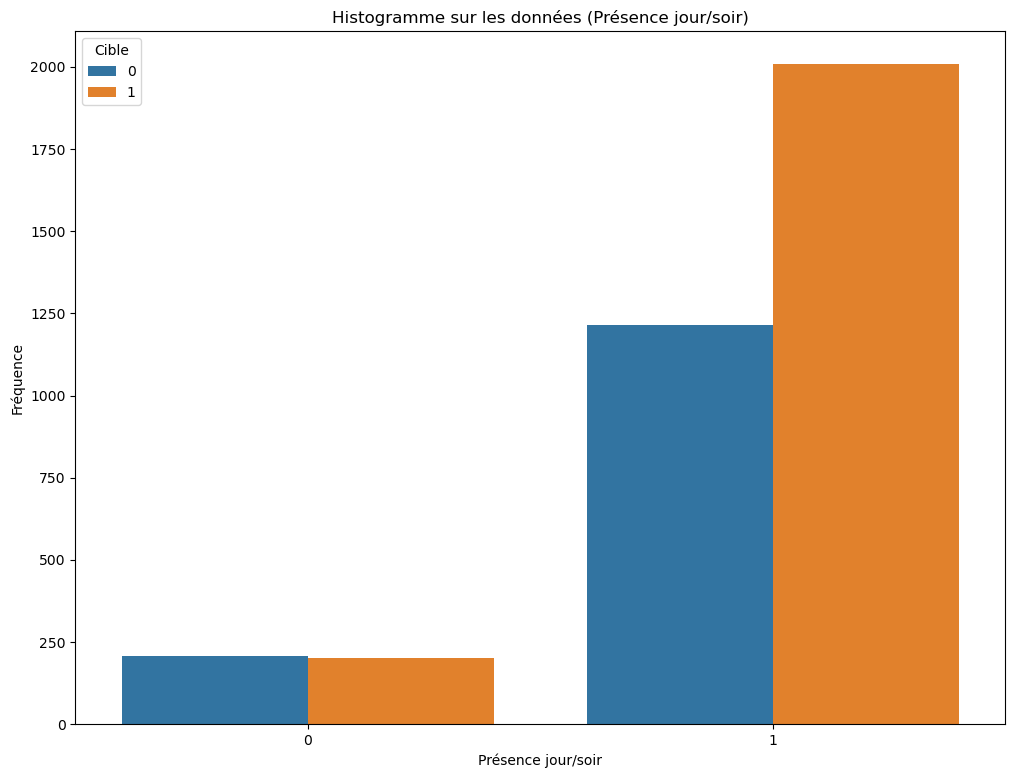

Informations intéressantes sur les données de la colonne Présence jour/soir :
-------------------------------------------------------------------
count    3630.000000
mean        0.887603
std         0.315897
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Présence jour/soir, dtype: float64


Valeurs majoritaire de la colonne (Présence jour/soir) :
------------------------------------------------
Jour (1) : 3222 (88.76%)
Soir (0) : 408 (11.24%)


In [28]:
analyse_stats_donnee(data, "Présence jour/soir", "Catégorique")

`Qualification antérieure`

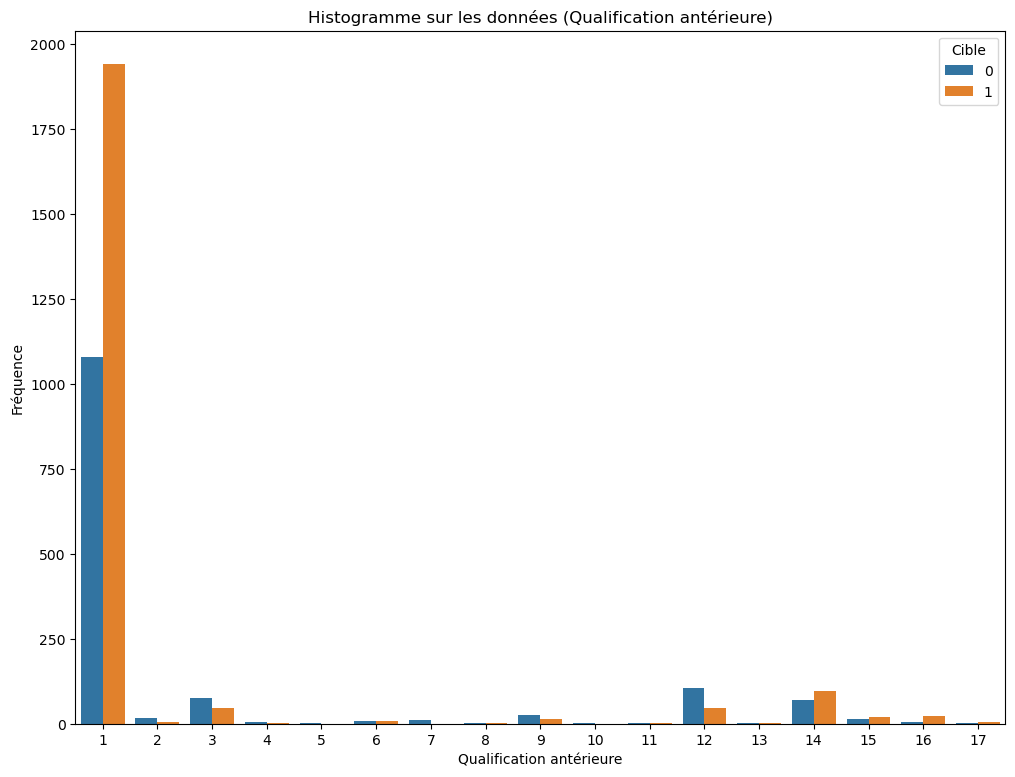

Informations intéressantes sur les données de la colonne Qualification antérieure :
-------------------------------------------------------------------
count    3630.000000
mean        2.552617
std         3.952440
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        17.000000
Name: Qualification antérieure, dtype: float64


Valeurs majoritaire de la colonne (Qualification antérieure) :
------------------------------------------------
Étude secondaire (1) : 3019 (83.17%)
Cours de spécialisation technologique (14) : 164 (4.52%)
Étude de base de 3e cycle (9ème/10ème/11ème année) ou équivalent (12) : 149 (4.10%)


In [29]:
analyse_stats_donnee(data, "Qualification antérieure", "Catégorique")

### Données académiques à la fin du premier semestre

`Unités curriculaires 1er semestre (créditées)`

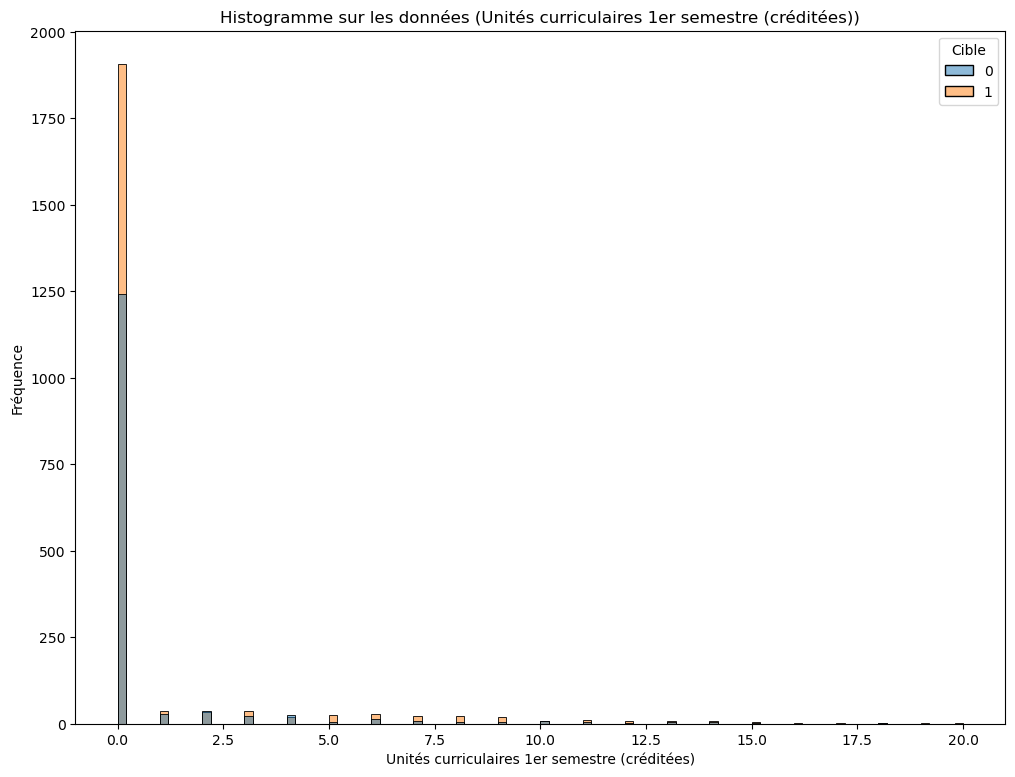

Informations intéressantes sur les données de la colonne Unités curriculaires 1er semestre (créditées) :
-------------------------------------------------------------------
count    3630.000000
mean        0.754270
std         2.477277
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: Unités curriculaires 1er semestre (créditées), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 1er semestre (créditées)) :
------------------------------------------------
0 : 3150 (86.78%)
2 : 71 (1.96%)
1 : 67 (1.85%)


In [30]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (créditées)", "Numérique")

`Unités curriculaires 1er semestre (inscrits)`

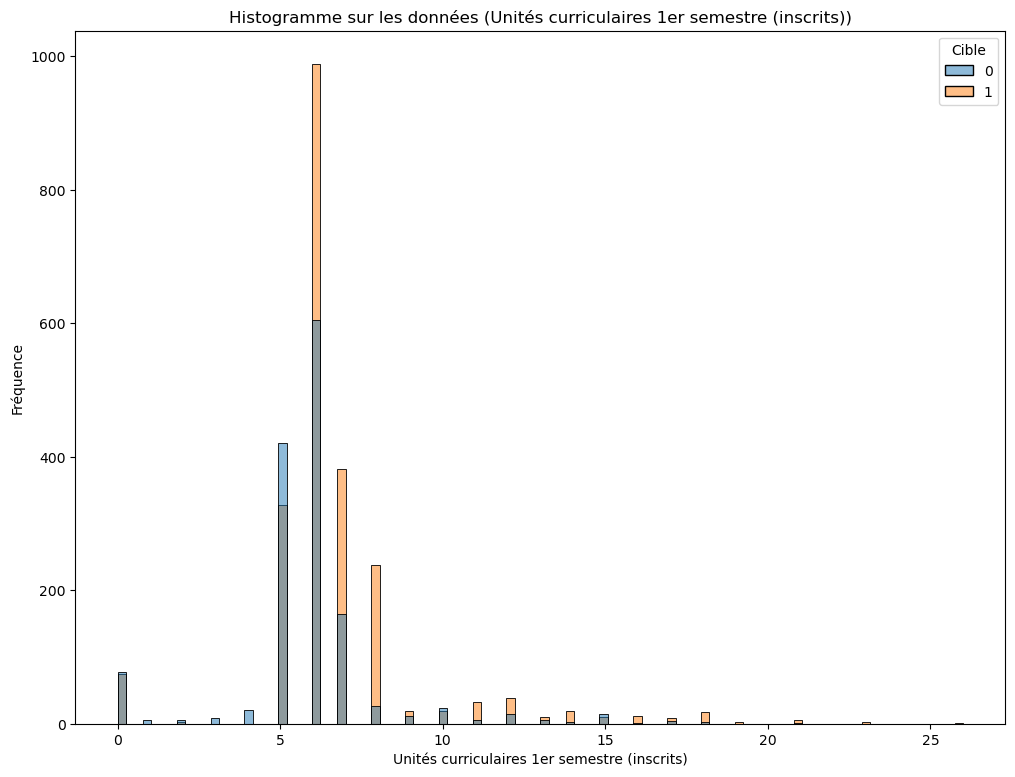

Informations intéressantes sur les données de la colonne Unités curriculaires 1er semestre (inscrits) :
-------------------------------------------------------------------
count    3630.000000
mean        6.337466
std         2.570773
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        26.000000
Name: Unités curriculaires 1er semestre (inscrits), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 1er semestre (inscrits)) :
------------------------------------------------
6 : 1594 (43.91%)
5 : 749 (20.63%)
7 : 546 (15.04%)


In [31]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (inscrits)", "Numérique")

`Unités curriculaires 1er semestre (évaluations)`

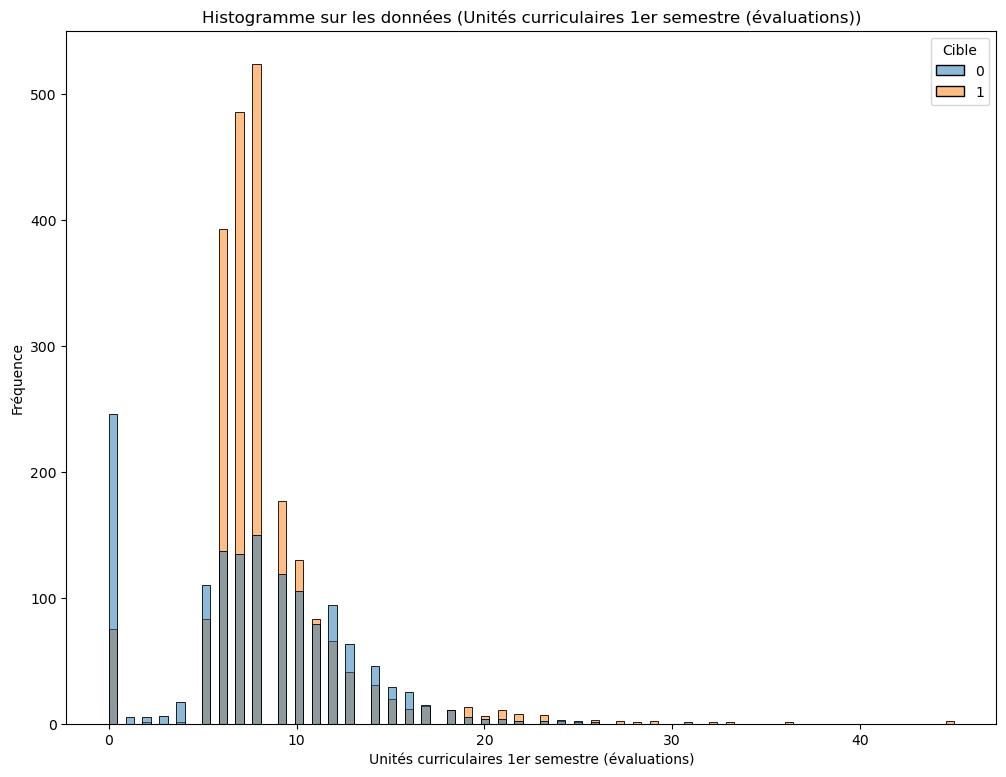

Informations intéressantes sur les données de la colonne Unités curriculaires 1er semestre (évaluations) :
-------------------------------------------------------------------
count    3630.000000
mean        8.071074
std         4.286632
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        45.000000
Name: Unités curriculaires 1er semestre (évaluations), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 1er semestre (évaluations)) :
------------------------------------------------
8 : 674 (18.57%)
7 : 621 (17.11%)
6 : 530 (14.60%)


In [32]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (évaluations)", "Numérique")

`Unités curriculaires 1er semestre (approuvées)`

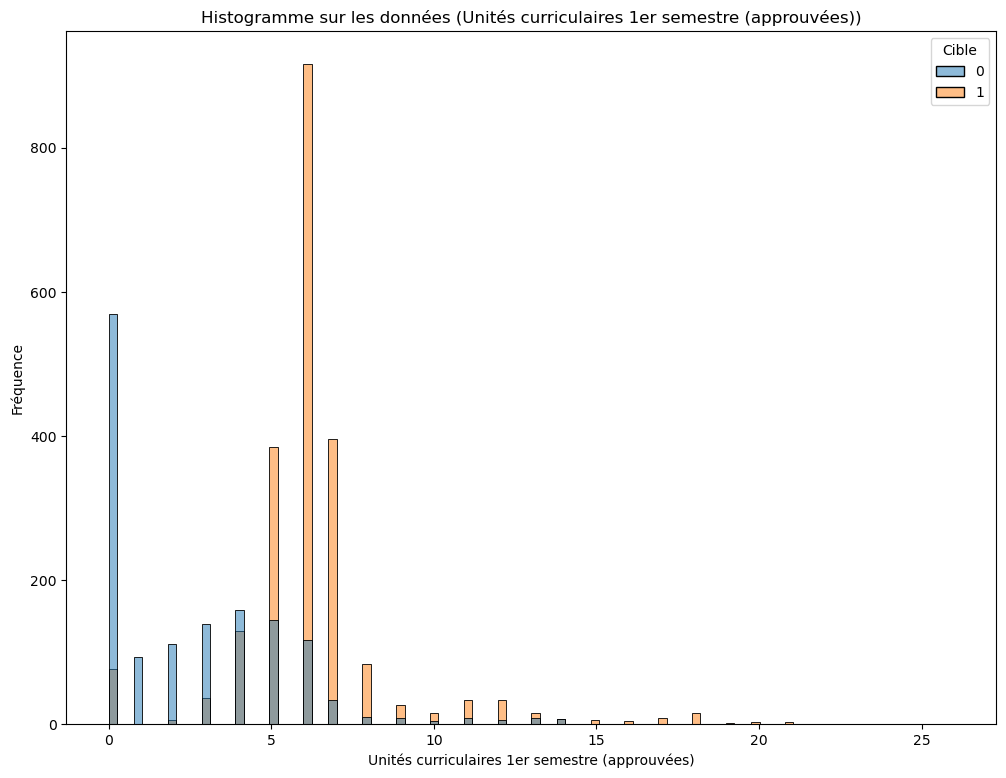

Informations intéressantes sur les données de la colonne Unités curriculaires 1er semestre (approuvées) :
-------------------------------------------------------------------
count    3630.000000
mean        4.791460
std         3.237845
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        26.000000
Name: Unités curriculaires 1er semestre (approuvées), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 1er semestre (approuvées)) :
------------------------------------------------
6 : 1033 (28.46%)
0 : 647 (17.82%)
5 : 530 (14.60%)


In [33]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (approuvées)", "Numérique")

`Unités curriculaires 1er semestre (note)`

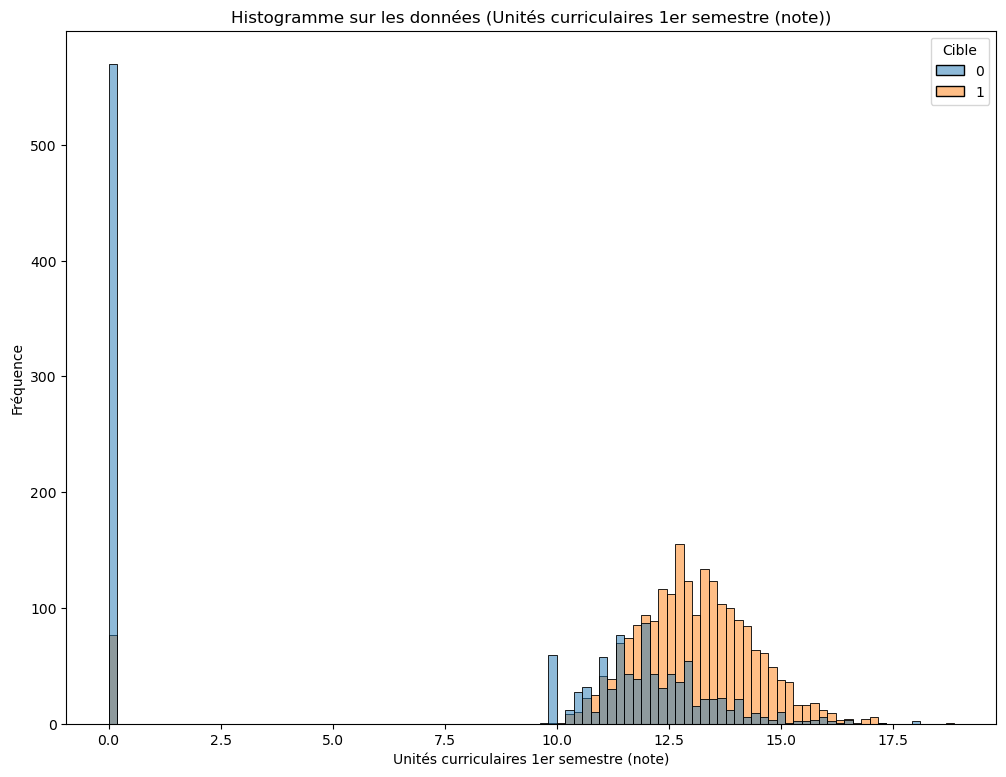

Informations intéressantes sur les données de la colonne Unités curriculaires 1er semestre (note) :
-------------------------------------------------------------------
count    3630.000000
mean       10.534860
std         5.057694
min         0.000000
25%        11.000000
50%        12.341429
75%        13.500000
max        18.875000
Name: Unités curriculaires 1er semestre (note), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 1er semestre (note)) :
------------------------------------------------
0.0 : 647 (17.82%)
12.0 : 153 (4.21%)
13.0 : 123 (3.39%)


In [34]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (note)", "Numérique")

`Unités curriculaires 1er semestre (sans évaluations)`

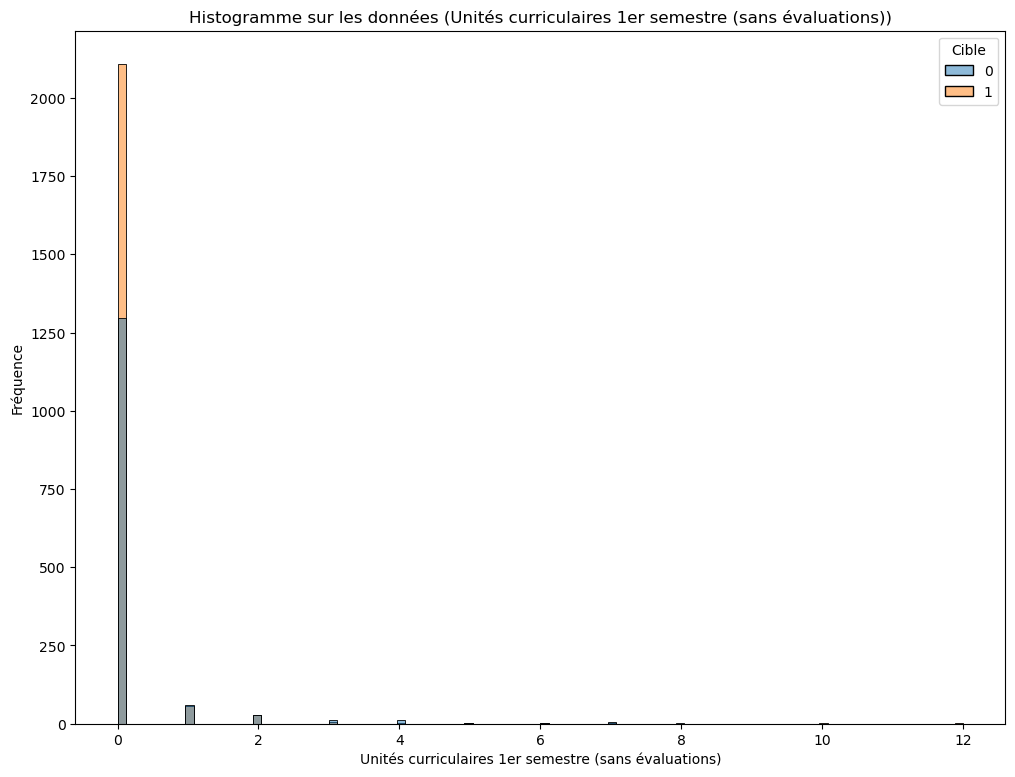

Informations intéressantes sur les données de la colonne Unités curriculaires 1er semestre (sans évaluations) :
-------------------------------------------------------------------
count    3630.000000
mean        0.128926
std         0.679111
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Unités curriculaires 1er semestre (sans évaluations), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 1er semestre (sans évaluations)) :
------------------------------------------------
0 : 3406 (93.83%)
1 : 118 (3.25%)
2 : 58 (1.60%)


In [35]:
analyse_stats_donnee(data, "Unités curriculaires 1er semestre (sans évaluations)", "Numérique")

### Données académiques à la fin du deuxième semestre

`Unités curriculaires 2e semestre (créditées)`

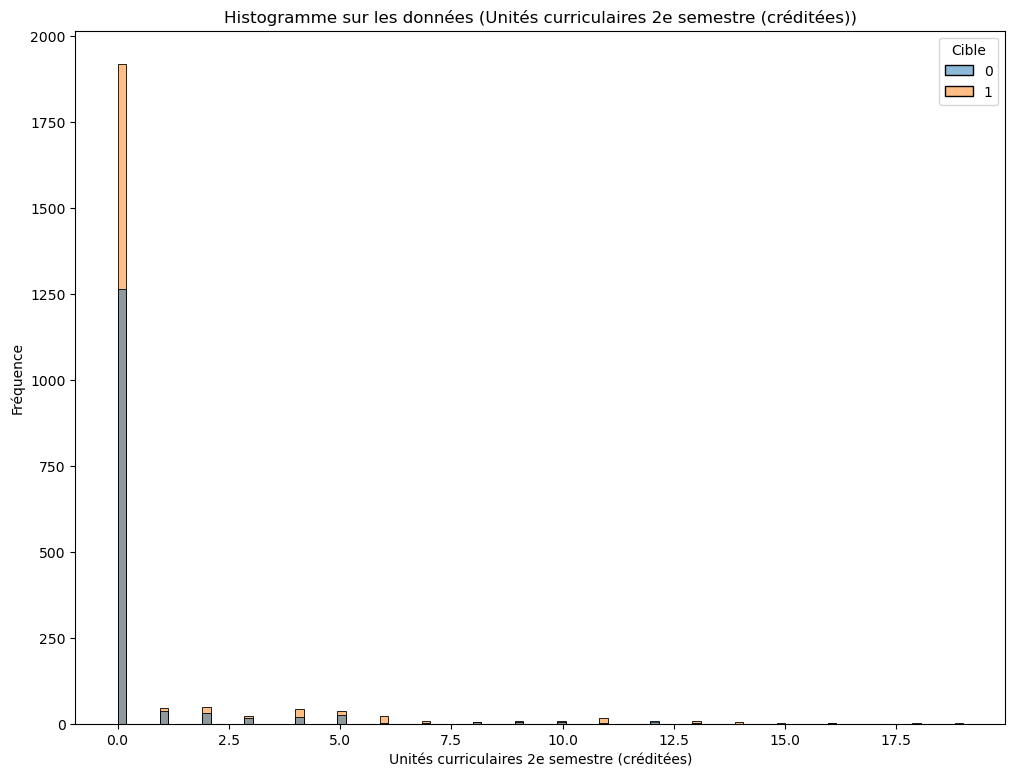

Informations intéressantes sur les données de la colonne Unités curriculaires 2e semestre (créditées) :
-------------------------------------------------------------------
count    3630.000000
mean        0.581818
std         2.022688
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.000000
Name: Unités curriculaires 2e semestre (créditées), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 2e semestre (créditées)) :
------------------------------------------------
0 : 3183 (87.69%)
1 : 82 (2.26%)
2 : 80 (2.20%)


In [36]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (créditées)", "Numérique")

`Unités curriculaires 2e semestre (inscrits)`

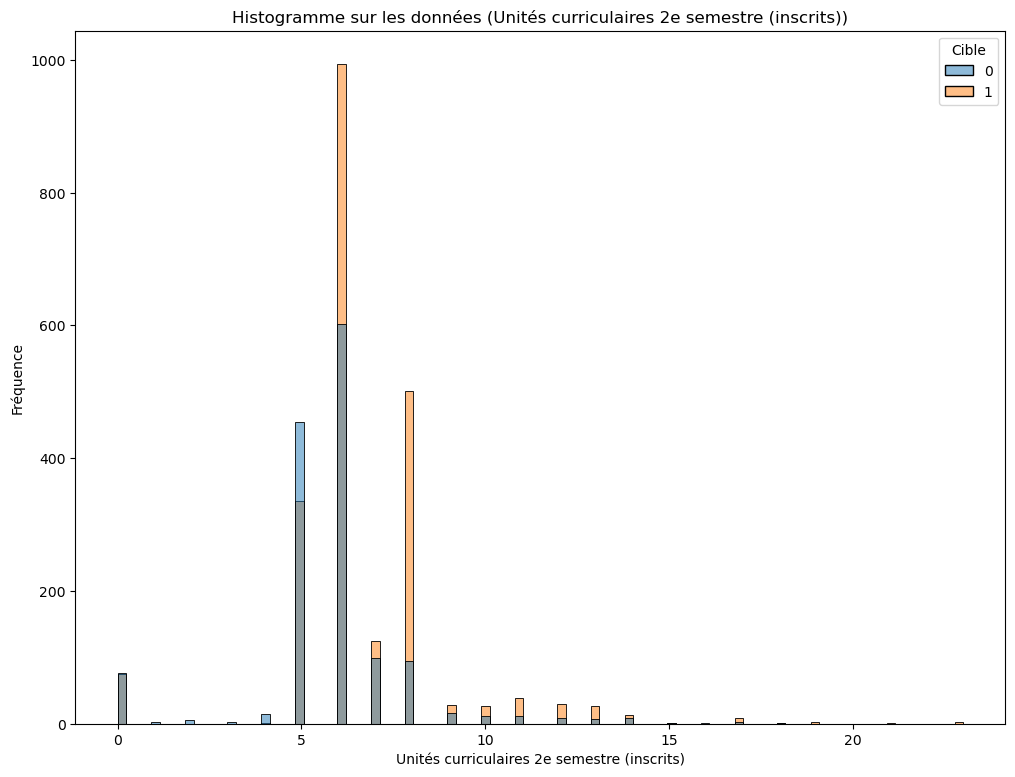

Informations intéressantes sur les données de la colonne Unités curriculaires 2e semestre (inscrits) :
-------------------------------------------------------------------
count    3630.000000
mean        6.296419
std         2.263020
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        23.000000
Name: Unités curriculaires 2e semestre (inscrits), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 2e semestre (inscrits)) :
------------------------------------------------
6 : 1596 (43.97%)
5 : 789 (21.74%)
8 : 596 (16.42%)


In [37]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (inscrits)", "Numérique")

`Unités curriculaires 2e semestre (évaluations)`

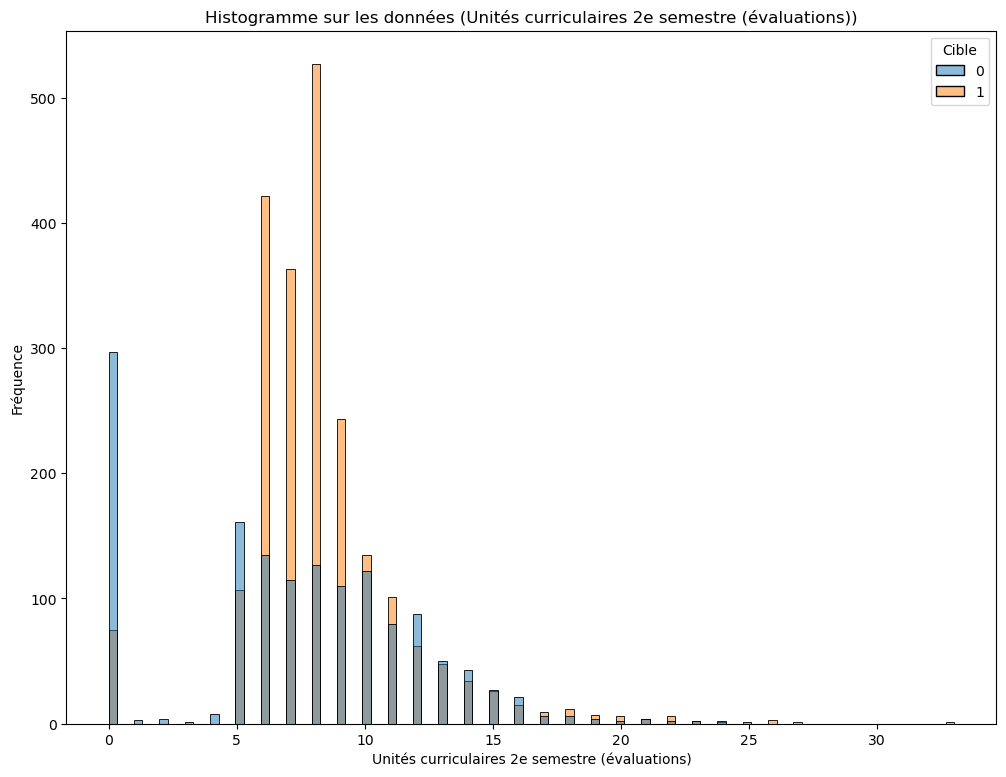

Informations intéressantes sur les données de la colonne Unités curriculaires 2e semestre (évaluations) :
-------------------------------------------------------------------
count    3630.000000
mean        7.763085
std         3.964163
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        33.000000
Name: Unités curriculaires 2e semestre (évaluations), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 2e semestre (évaluations)) :
------------------------------------------------
8 : 654 (18.02%)
6 : 556 (15.32%)
7 : 478 (13.17%)


In [38]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (évaluations)", "Numérique")

`Unités curriculaires 2e semestre (approuvées)`

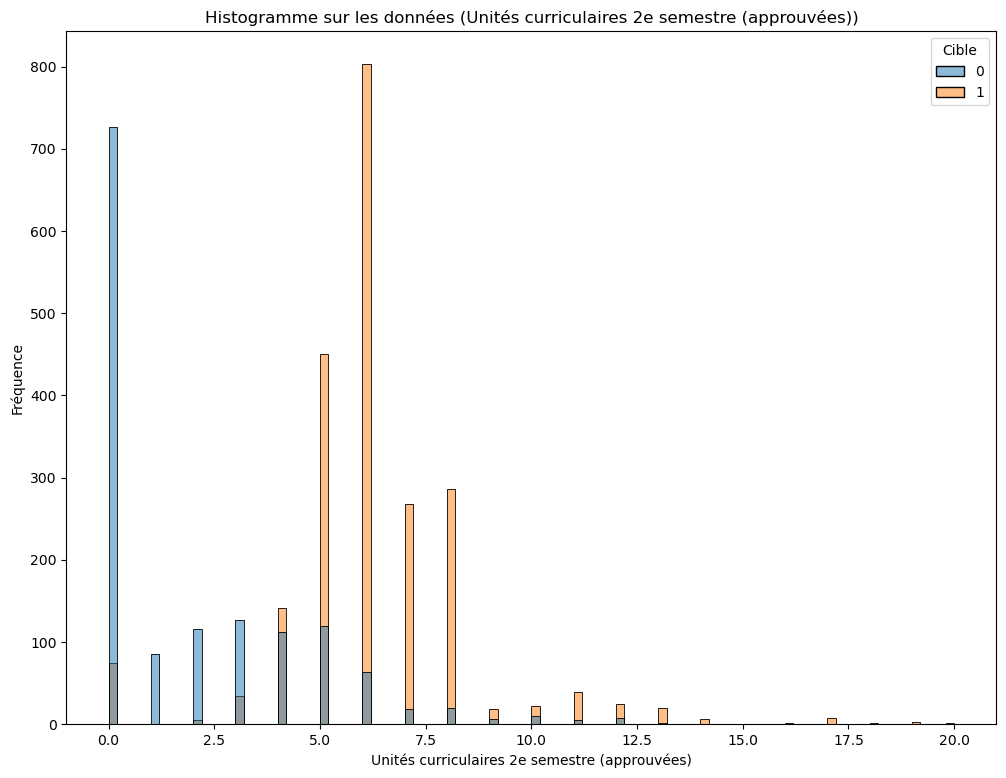

Informations intéressantes sur les données de la colonne Unités curriculaires 2e semestre (approuvées) :
-------------------------------------------------------------------
count    3630.000000
mean        4.518457
std         3.162376
min         0.000000
25%         2.000000
50%         5.000000
75%         6.000000
max        20.000000
Name: Unités curriculaires 2e semestre (approuvées), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 2e semestre (approuvées)) :
------------------------------------------------
6 : 867 (23.88%)
0 : 802 (22.09%)
5 : 569 (15.67%)


In [39]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (approuvées)", "Numérique")

`Unités curriculaires 2e semestre (note)`

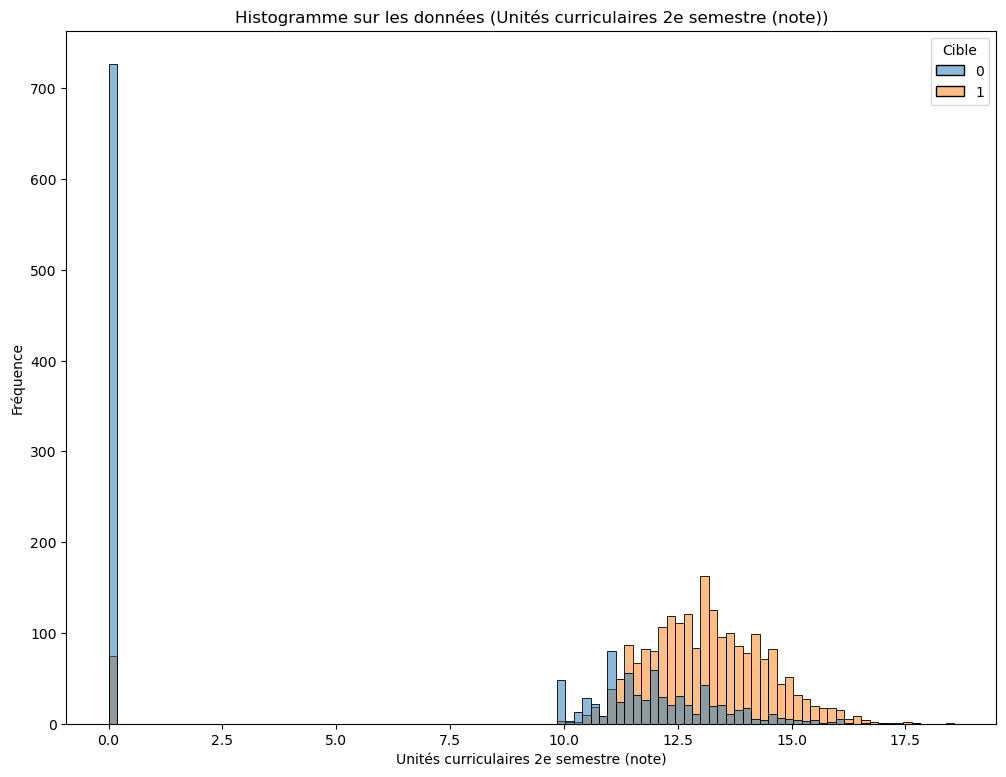

Informations intéressantes sur les données de la colonne Unités curriculaires 2e semestre (note) :
-------------------------------------------------------------------
count    3630.000000
mean       10.036155
std         5.481742
min         0.000000
25%        10.517857
50%        12.333333
75%        13.500000
max        18.571429
Name: Unités curriculaires 2e semestre (note), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 2e semestre (note)) :
------------------------------------------------
0.0 : 802 (22.09%)
12.0 : 122 (3.36%)
13.0 : 117 (3.22%)


In [40]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (note)", "Numérique")

`Unités curriculaires 2e semestre (sans évaluations)`

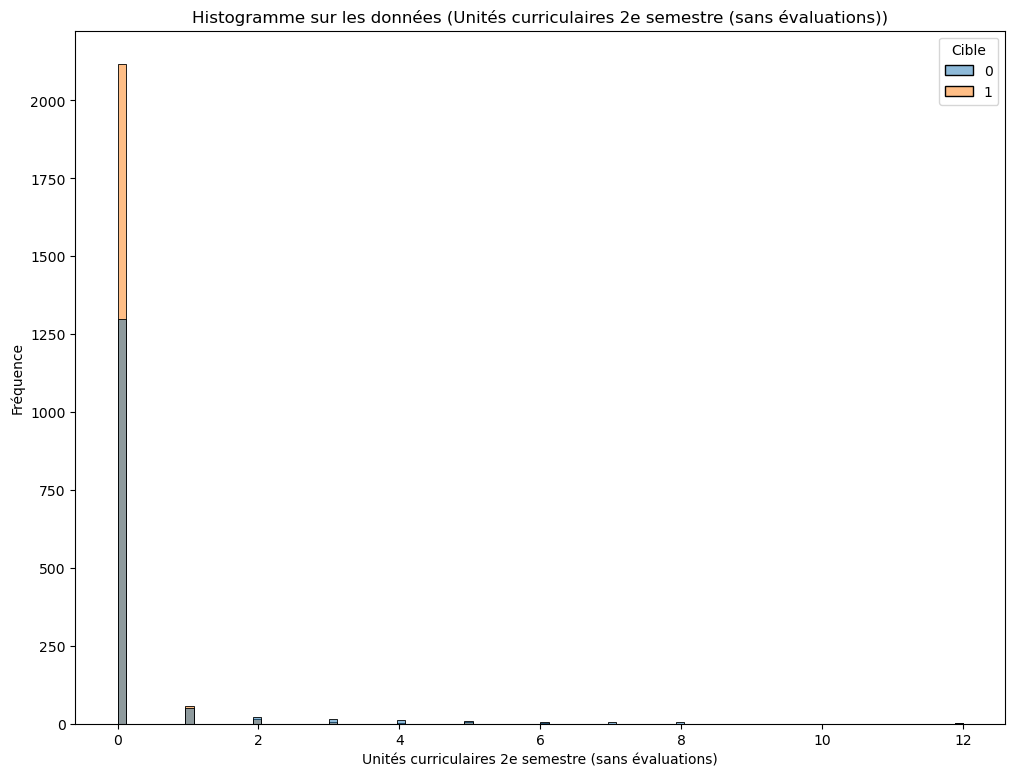

Informations intéressantes sur les données de la colonne Unités curriculaires 2e semestre (sans évaluations) :
-------------------------------------------------------------------
count    3630.000000
mean        0.142149
std         0.747670
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Unités curriculaires 2e semestre (sans évaluations), dtype: float64


Valeurs majoritaire de la colonne (Unités curriculaires 2e semestre (sans évaluations)) :
------------------------------------------------
0 : 3416 (94.10%)
1 : 107 (2.95%)
2 : 35 (0.96%)


In [41]:
analyse_stats_donnee(data, "Unités curriculaires 2e semestre (sans évaluations)", "Numérique")

### Données Cible

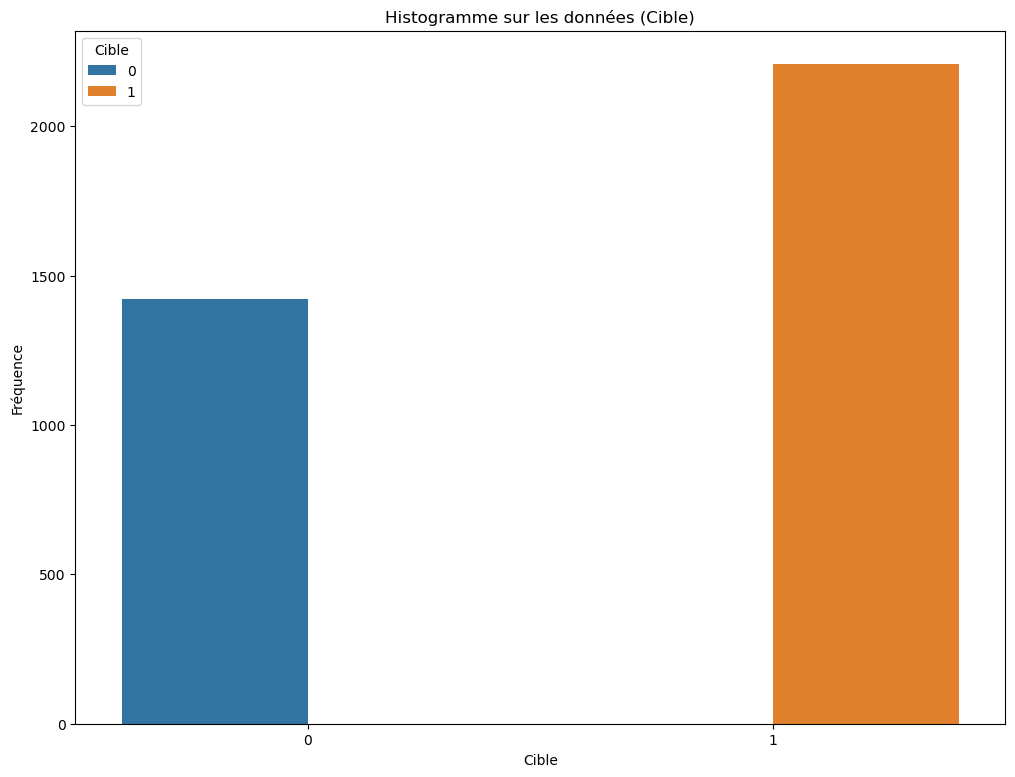

Informations intéressantes sur les données de la colonne Cible :
-------------------------------------------------------------------
count    3630.000000
mean        0.608540
std         0.488144
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Cible, dtype: float64


Valeurs majoritaire de la colonne (Cible) :
------------------------------------------------
Gradué (1) : 2209 (60.85%)
Abandonné (0) : 1421 (39.15%)


In [42]:
analyse_stats_donnee(data, "Cible", "Catégorique")